# How does the fringe transmission change on the sides of the PSF peak?
We perform here the same analysis as in Notebook 5, but for all point source observations throughout the different MIRI ground test campaigns.

## > Import modules

In [3]:
import funcs
import mrsobs

import numpy as np
import scipy.interpolate as scp_interpolate
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
plt.style.use('presentation')
%matplotlib notebook

import warnings
warnings.simplefilter('ignore')

## > Get data
We load the images for one band of the MRS for different point source positions, from different ground tests, including: 
* FM MRS-OPT-01    (MRS FOV and Distortion Measurements)
* FM MRS-OPT-02    (MRS Image Quality)
* FM MRS-OPT-06    (Across Slit Scans)
* CV1RR MRS-OPT-02 (MRS Image Quality)
* CV2 MRS-OPT-02   (MRS Image Quality)
* CV3 MRS-OPT-02   (MRS Image Quality)

In [4]:
# Define paths to data
workDir   = '/Users/ioannisa/Desktop/python/miri_devel/'
cdpDir    = workDir+'cdp_data/'
d2cMapDir = workDir+'distortionMaps/'
lvl2path  = workDir+'FM_data/LVL2/'

# Get data
band = '1A'
FM_MRS_OPT_01_raster_centroid       = funcs.load_obj('FM_MRS_OPT_01_raster_centroid',path='obj/')
FM_MRS_OPT_02_centroid              = funcs.load_obj('FM_MRS_OPT_02_centroid',path='obj/')
FM_MRS_OPT_06_leftraster_centroid   = funcs.load_obj('FM_MRS_OPT_06_leftraster_centroid',path='obj/')
FM_MRS_OPT_06_middleraster_centroid = funcs.load_obj('FM_MRS_OPT_06_middleraster_centroid',path='obj/')
FM_MRS_OPT_06_rightraster_centroid  = funcs.load_obj('FM_MRS_OPT_06_rightraster_centroid',path='obj/')
CV1RR_MRS_OPT_02_centroid           = funcs.load_obj('CV1RR_MRS_OPT_02_centroid',path='obj/')
CV2_MRS_OPT_02_centroid             = funcs.load_obj('CV2_MRS_OPT_02_centroid',path='obj/')
CV3_MRS_OPT_02_centroid             = funcs.load_obj('CV3_MRS_OPT_02_centroid',path='obj/')
ext_source_sci,ext_source_bkg       = mrsobs.FM_MTS_BB_extended_source(lvl2path,band,bb_temp='800K')
ext_etal_source_sci,ext_etal_source_bkg     = mrsobs.FM_MTS_800K_BB_extended_source_through_etalon(lvl2path,band,etalon='ET1A')

# Get wavelength calibration pixel map
d2cMaps   = funcs.load_obj('d2cMaps_band{}'.format(band),path=d2cMapDir)
lambdaMap = d2cMaps['lambdaMap']
alphaMap = d2cMaps['alphaMap']
nslices   = d2cMaps['nslices']

# Get spectral resolution table
specres_table = funcs.get_cdps(cdpDir=cdpDir,band=band)[4]

In [5]:
# calibrate extended source observation
ext_source_bkgsubtr    = ext_source_sci-ext_source_bkg
ext_source_oddevencorr = funcs.OddEvenRowSignalCorrection(ext_source_bkgsubtr)

# calibrate extended source etalon observation
ext_etal_source_bkgsubtr   = ext_etal_source_sci-ext_etal_source_bkg
ext_etal_source_oddevencorr = funcs.OddEvenRowSignalCorrection(ext_etal_source_bkgsubtr)

<IPython.core.display.Javascript object>


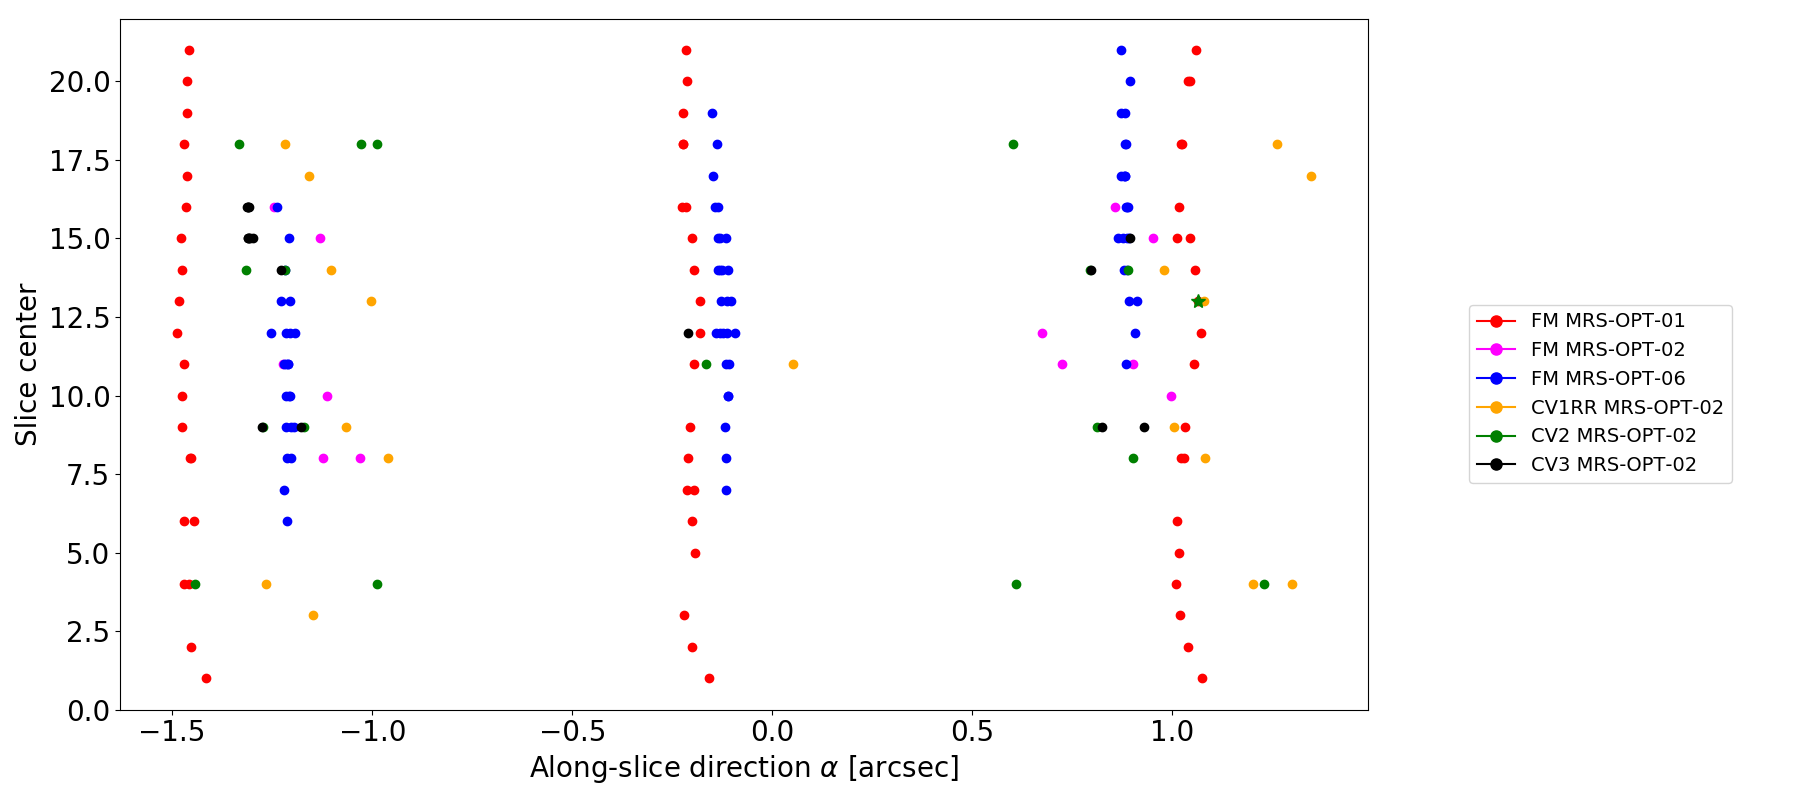

In [6]:
plt.figure(figsize=(18,8))
for pointing in FM_MRS_OPT_01_raster_centroid.keys():
    key = pointing
    plt.plot(np.mean(FM_MRS_OPT_01_raster_centroid[key][2][~np.isnan(FM_MRS_OPT_01_raster_centroid[key][2])]),FM_MRS_OPT_01_raster_centroid[key][0],'ro')
for pointing in FM_MRS_OPT_02_centroid.keys():
    key = pointing
    plt.plot(np.mean(FM_MRS_OPT_02_centroid[key][2][~np.isnan(FM_MRS_OPT_02_centroid[key][2])]),FM_MRS_OPT_02_centroid[key][0],'o',color='magenta')
for pointing in FM_MRS_OPT_06_leftraster_centroid.keys():
    key = pointing
    plt.plot(np.mean(FM_MRS_OPT_06_leftraster_centroid[key][2][~np.isnan(FM_MRS_OPT_06_leftraster_centroid[key][2])]),FM_MRS_OPT_06_leftraster_centroid[key][0],'bo')
for pointing in FM_MRS_OPT_06_middleraster_centroid.keys():
    key = pointing
    plt.plot(np.mean(FM_MRS_OPT_06_middleraster_centroid[key][2][~np.isnan(FM_MRS_OPT_06_middleraster_centroid[key][2])]),FM_MRS_OPT_06_middleraster_centroid[key][0],'bo')
for pointing in FM_MRS_OPT_06_rightraster_centroid.keys():
    key = pointing
    plt.plot(np.mean(FM_MRS_OPT_06_rightraster_centroid[key][2][~np.isnan(FM_MRS_OPT_06_rightraster_centroid[key][2])]),FM_MRS_OPT_06_rightraster_centroid[key][0],'bo')
for pointing in CV1RR_MRS_OPT_02_centroid.keys():
    key = pointing
    plt.plot(np.mean(CV1RR_MRS_OPT_02_centroid[key][2][~np.isnan(CV1RR_MRS_OPT_02_centroid[key][2])]),CV1RR_MRS_OPT_02_centroid[key][0],'o',color='orange')
for pointing in CV2_MRS_OPT_02_centroid.keys():
    key = pointing
    plt.plot(np.mean(CV2_MRS_OPT_02_centroid[key][2][~np.isnan(CV2_MRS_OPT_02_centroid[key][2])]),CV2_MRS_OPT_02_centroid[key][0],'go')
for pointing in CV3_MRS_OPT_02_centroid.keys():
    key = pointing
    plt.plot(np.mean(CV3_MRS_OPT_02_centroid[key][2][~np.isnan(CV3_MRS_OPT_02_centroid[key][2])]),CV3_MRS_OPT_02_centroid[key][0],'ko')
plt.plot(np.mean(FM_MRS_OPT_01_raster_centroid['P36'][2][~np.isnan(FM_MRS_OPT_01_raster_centroid['P36'][2])]),FM_MRS_OPT_01_raster_centroid['P36'][0],'g*',markersize=10)
plt.xlabel(r'Along-slice direction $\alpha$ [arcsec]')
plt.ylabel('Slice center')
legend_elements = [Line2D([0],[0],marker='o',color='r',label='FM MRS-OPT-01',markerfacecolor='r',markersize=8),
                   Line2D([0],[0],marker='o',color='magenta',label='FM MRS-OPT-02',markerfacecolor='magenta',markersize=8),
                   Line2D([0],[0],marker='o',color='b',label='FM MRS-OPT-06',markerfacecolor='b',markersize=8),
                   Line2D([0],[0],marker='o',color='orange',label='CV1RR MRS-OPT-02',markerfacecolor='orange',markersize=8),
                   Line2D([0],[0],marker='o',color='g',label='CV2 MRS-OPT-02',markerfacecolor='g',markersize=8),
                   Line2D([0],[0],marker='o',color='k',label='CV3 MRS-OPT-02',markerfacecolor='k',markersize=8)]
plt.legend(handles=legend_elements,bbox_to_anchor=(1.3,0.6))
plt.tight_layout(rect=[0,0,0.77,1])

In [7]:
# Let's make a call function for the centroid data
def print_obs_in_slice(sliceID=None):
    for pointing in FM_MRS_OPT_01_raster_centroid.keys():       
        if FM_MRS_OPT_01_raster_centroid[pointing][0]       == sliceID: print 'FM_MRS_OPT_01: {}, {} arcsec'.format(pointing,round(np.mean(FM_MRS_OPT_01_raster_centroid[pointing][2][~np.isnan(FM_MRS_OPT_01_raster_centroid[pointing][2])]),2) )
    for pointing in FM_MRS_OPT_02_centroid.keys():              
        if FM_MRS_OPT_02_centroid[pointing][0]              == sliceID: print 'FM_MRS_OPT_02: {}, {} arcsec'.format(pointing,round(np.mean(FM_MRS_OPT_02_centroid[pointing][2][~np.isnan(FM_MRS_OPT_02_centroid[pointing][2])]),2) )
    for pointing in FM_MRS_OPT_06_leftraster_centroid.keys():   
        if FM_MRS_OPT_06_leftraster_centroid[pointing][0]   == sliceID: print 'FM_MRS_OPT_06 left: {}, {} arcsec'.format(pointing,round(np.mean(FM_MRS_OPT_06_leftraster_centroid[pointing][2][~np.isnan(FM_MRS_OPT_06_leftraster_centroid[pointing][2])]),2) )
    for pointing in FM_MRS_OPT_06_middleraster_centroid.keys(): 
        if FM_MRS_OPT_06_middleraster_centroid[pointing][0] == sliceID: print 'FM_MRS_OPT_06 middle: {}, {} arcsec'.format(pointing,round(np.mean(FM_MRS_OPT_06_middleraster_centroid[pointing][2][~np.isnan(FM_MRS_OPT_06_middleraster_centroid[pointing][2])]),2) )
    for pointing in FM_MRS_OPT_06_rightraster_centroid.keys():  
        if FM_MRS_OPT_06_rightraster_centroid[pointing][0]  == sliceID: print 'FM_MRS_OPT_06 right: {}, {} arcsec'.format(pointing,round(np.mean(FM_MRS_OPT_06_rightraster_centroid[pointing][2][~np.isnan(FM_MRS_OPT_06_rightraster_centroid[pointing][2])]),2) )
    for pointing in CV1RR_MRS_OPT_02_centroid.keys():      
        if CV1RR_MRS_OPT_02_centroid[pointing][0]      == sliceID: print 'CV1RR_MRS_OPT_02: {}, {} arcsec'.format(pointing,round(np.mean(CV1RR_MRS_OPT_02_centroid[pointing][2][~np.isnan(CV1RR_MRS_OPT_02_centroid[pointing][2])]),2) )
    for pointing in CV2_MRS_OPT_02_centroid.keys():        
        if CV2_MRS_OPT_02_centroid[pointing][0]        == sliceID: print 'CV2_MRS_OPT_02: {}, {} arcsec'.format(pointing,round(np.mean(CV2_MRS_OPT_02_centroid[pointing][2][~np.isnan(CV2_MRS_OPT_02_centroid[pointing][2])]),2) )
    for pointing in CV3_MRS_OPT_02_centroid.keys():        
        if CV3_MRS_OPT_02_centroid[pointing][0]             == sliceID: print 'CV3_MRS_OPT_02: {}, {} arcsec'.format(pointing,round(np.mean(CV3_MRS_OPT_02_centroid[pointing][2][~np.isnan(CV3_MRS_OPT_02_centroid[pointing][2])]),2) )

In [8]:
print_obs_in_slice(sliceID=11)

FM_MRS_OPT_01: P30, 1.05 arcsec
FM_MRS_OPT_01: P31, -1.47 arcsec
FM_MRS_OPT_01: P29, -0.19 arcsec
FM_MRS_OPT_02: P4, 0.72 arcsec
FM_MRS_OPT_02: P5, -1.22 arcsec
FM_MRS_OPT_02: P11, 0.9 arcsec
FM_MRS_OPT_06 left: P11, -1.21 arcsec
FM_MRS_OPT_06 left: P12, -1.21 arcsec
FM_MRS_OPT_06 left: P13, -1.22 arcsec
FM_MRS_OPT_06 left: P14, -1.22 arcsec
FM_MRS_OPT_06 middle: P6, -0.11 arcsec
FM_MRS_OPT_06 middle: P7, -0.12 arcsec
FM_MRS_OPT_06 right: P1, 0.88 arcsec
CV1RR_MRS_OPT_02: P0, 0.05 arcsec
CV2_MRS_OPT_02: P0, -0.16 arcsec


<IPython.core.display.Javascript object>


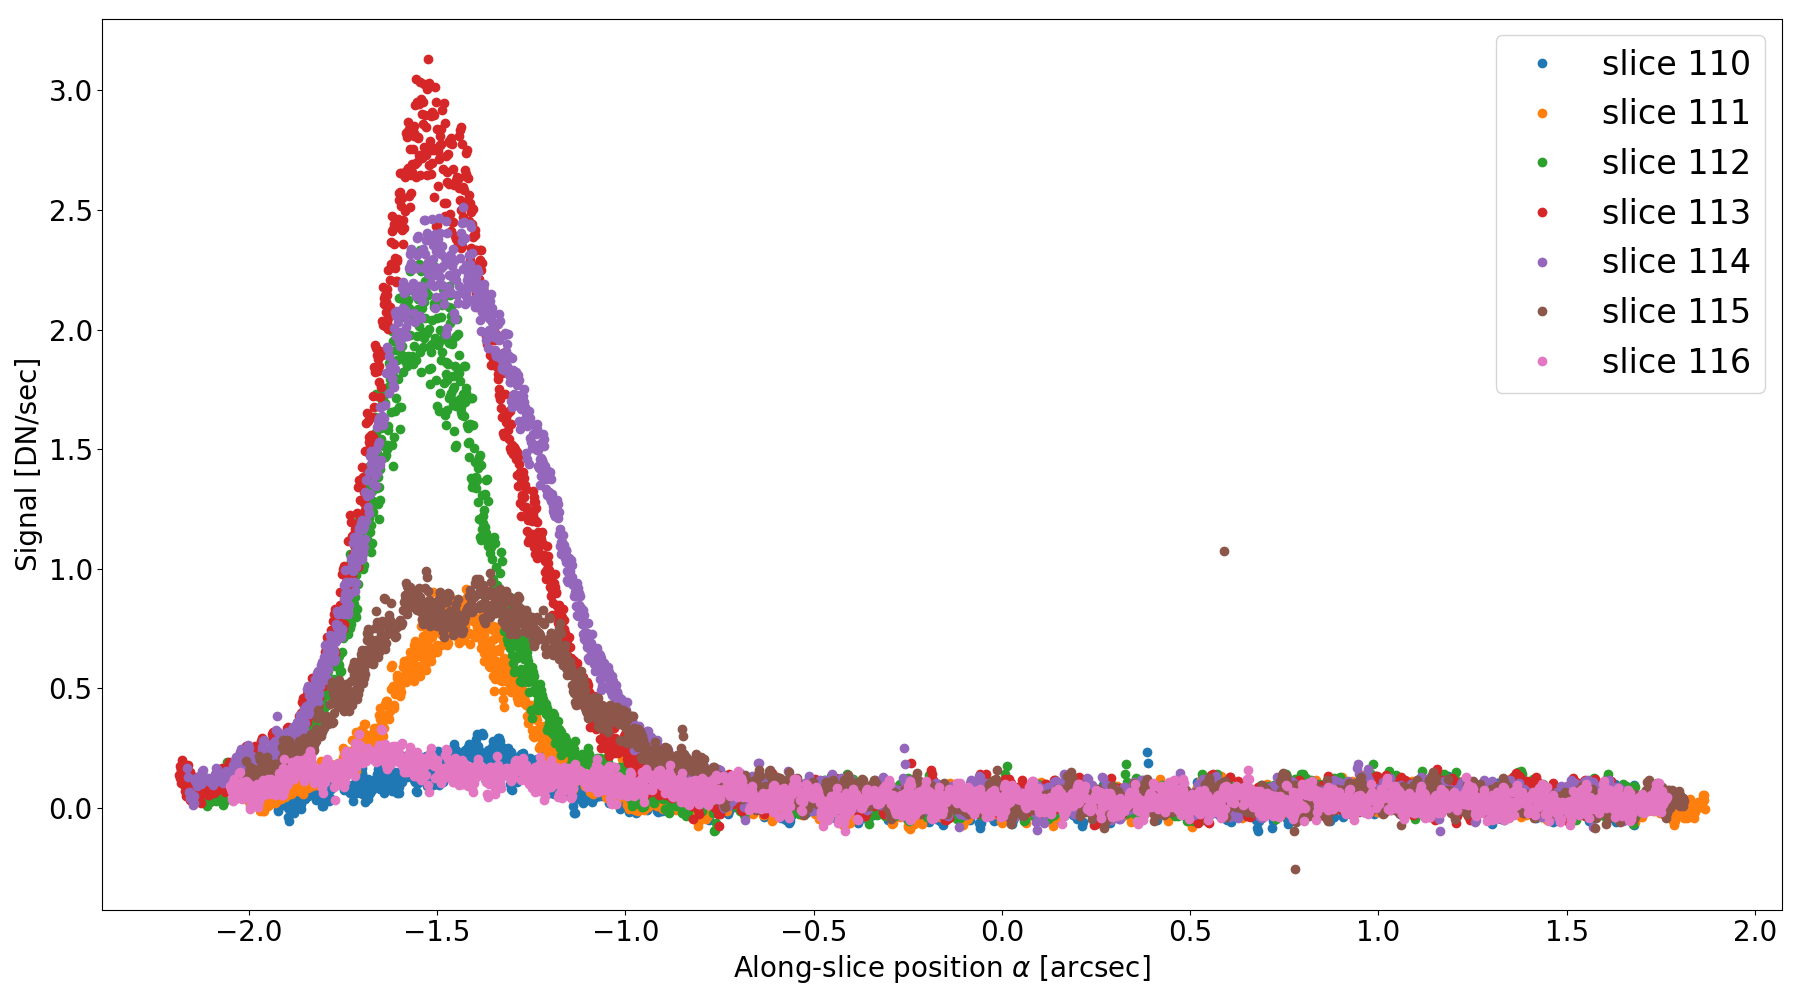

In [52]:
plt.figure(figsize=(18,10))
for sliceID in 100+np.arange(10,17):
    plt.plot(alphaMap[(d2cMaps['sliceMap']==sliceID) & (lambdaMap<5.)],point_source_oddevencorr[(d2cMaps['sliceMap']==sliceID) & (lambdaMap<5.)],'o',label='slice {}'.format(sliceID))
plt.legend(fontsize=24)
plt.xlabel(r'Along-slice position $\alpha$ [arcsec]')
plt.ylabel(r'Signal [DN/sec]')
plt.tight_layout()

<IPython.core.display.Javascript object>


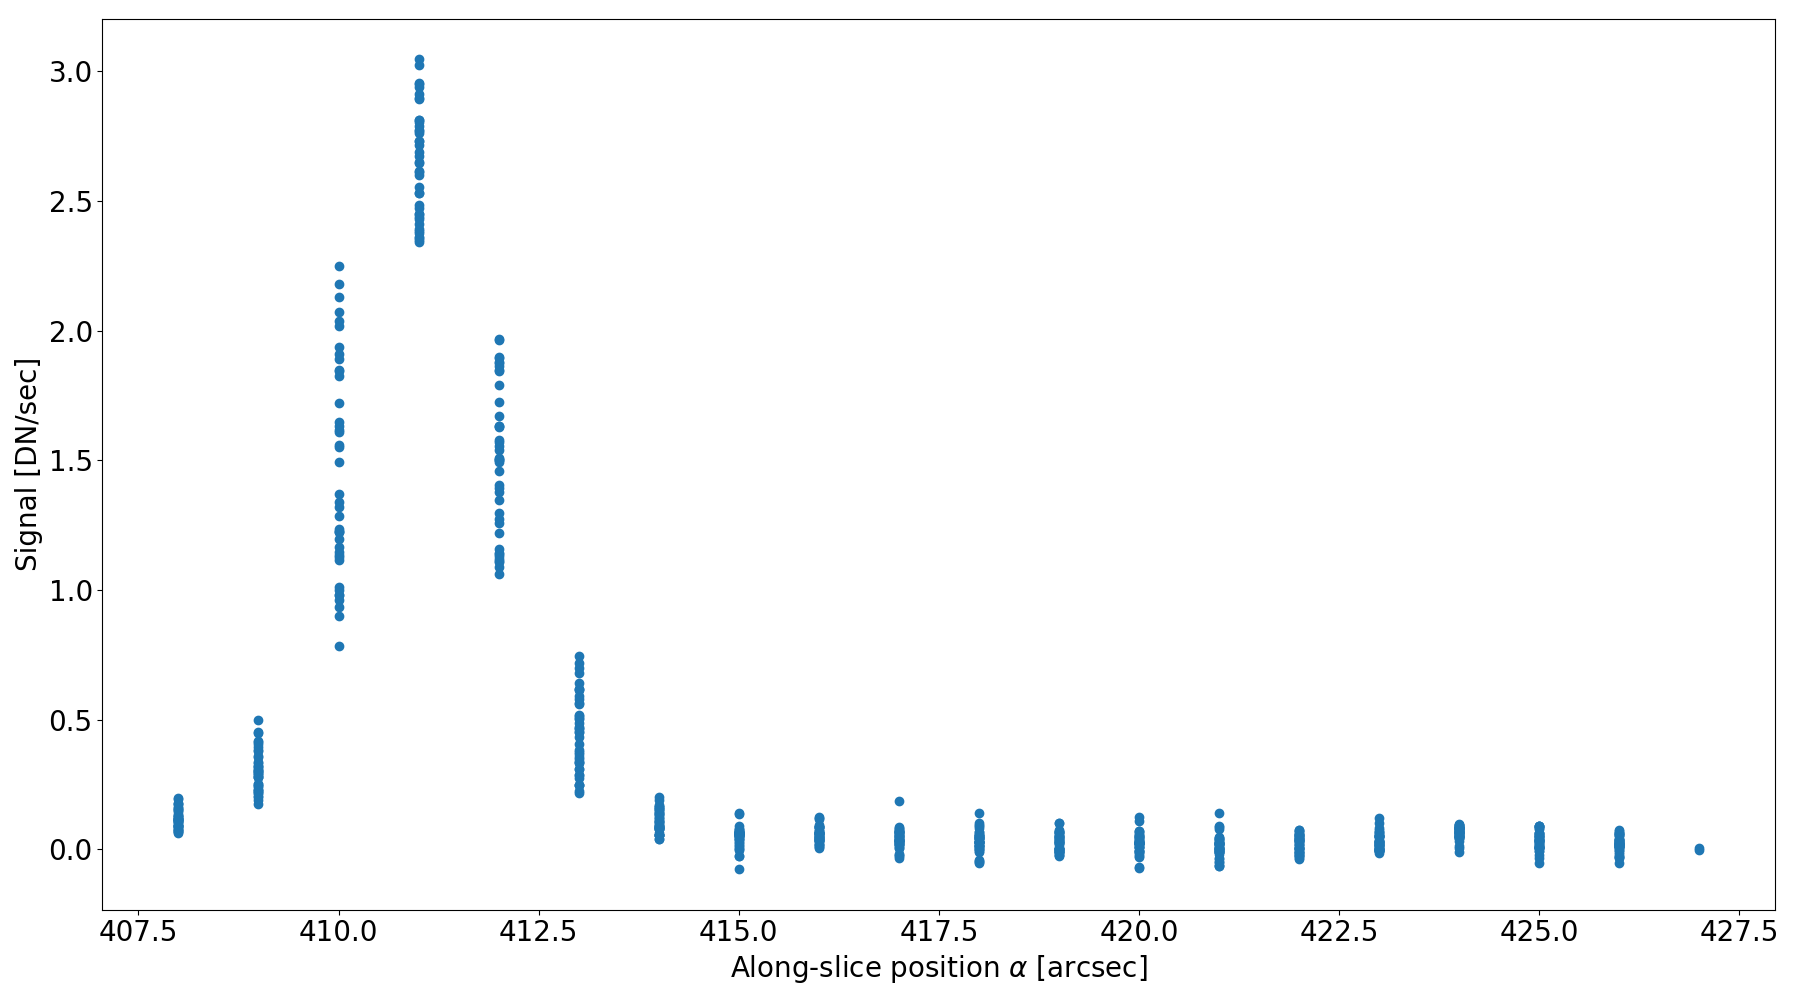

In [68]:
plt.figure(figsize=(18,10))
plt.plot()

<IPython.core.display.Javascript object>


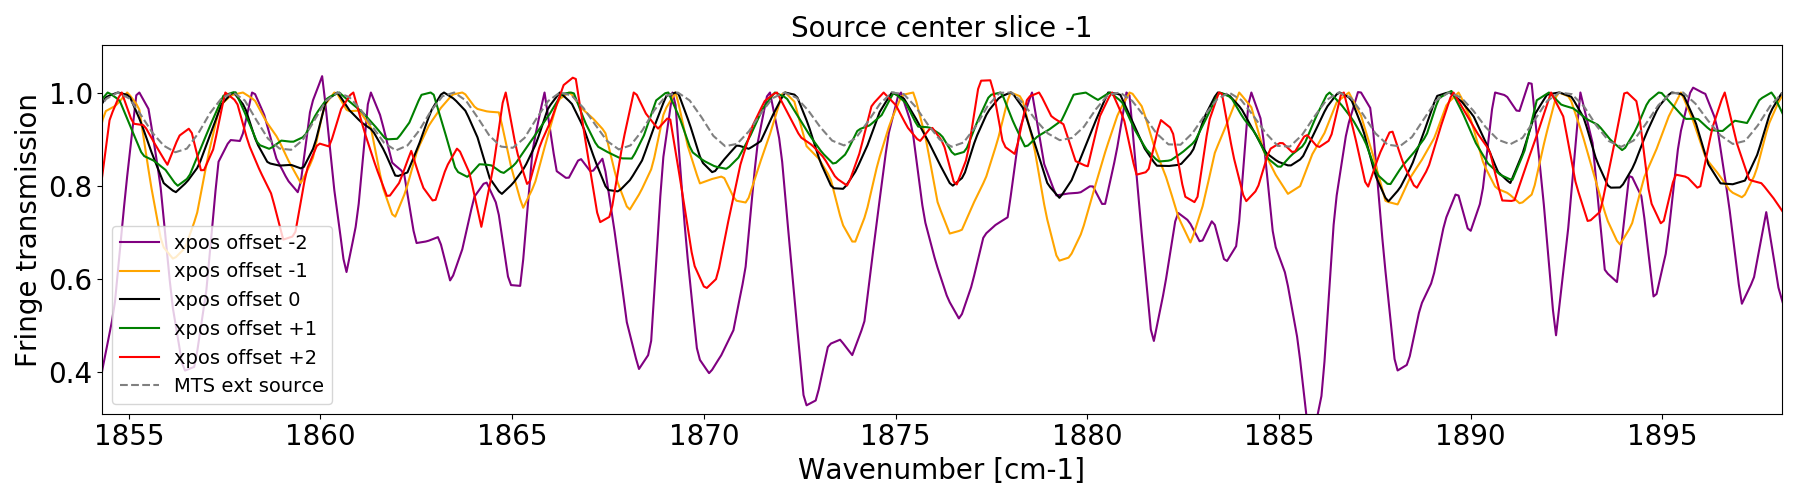

xpos_offset -2
xpos_offset -1
xpos_offset 0
xpos_offset 1
xpos_offset 2


<IPython.core.display.Javascript object>


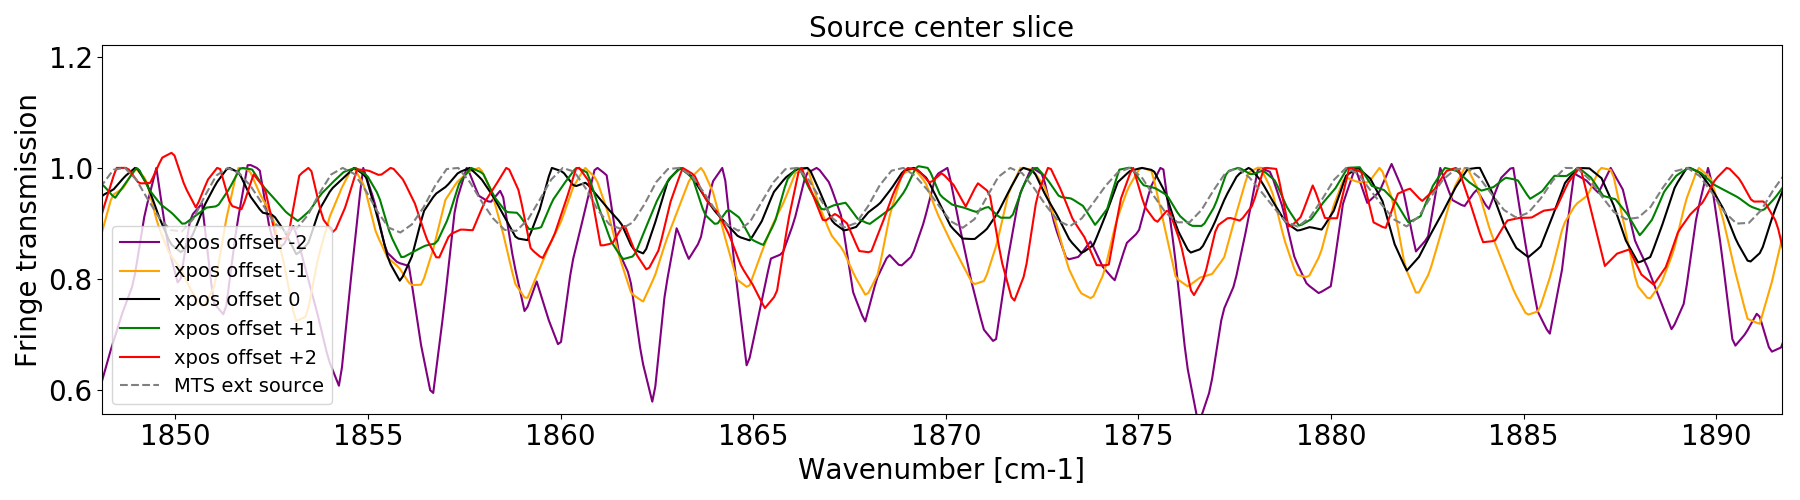

xpos_offset -2
xpos_offset -1
xpos_offset 0
xpos_offset 1
xpos_offset 2


<IPython.core.display.Javascript object>


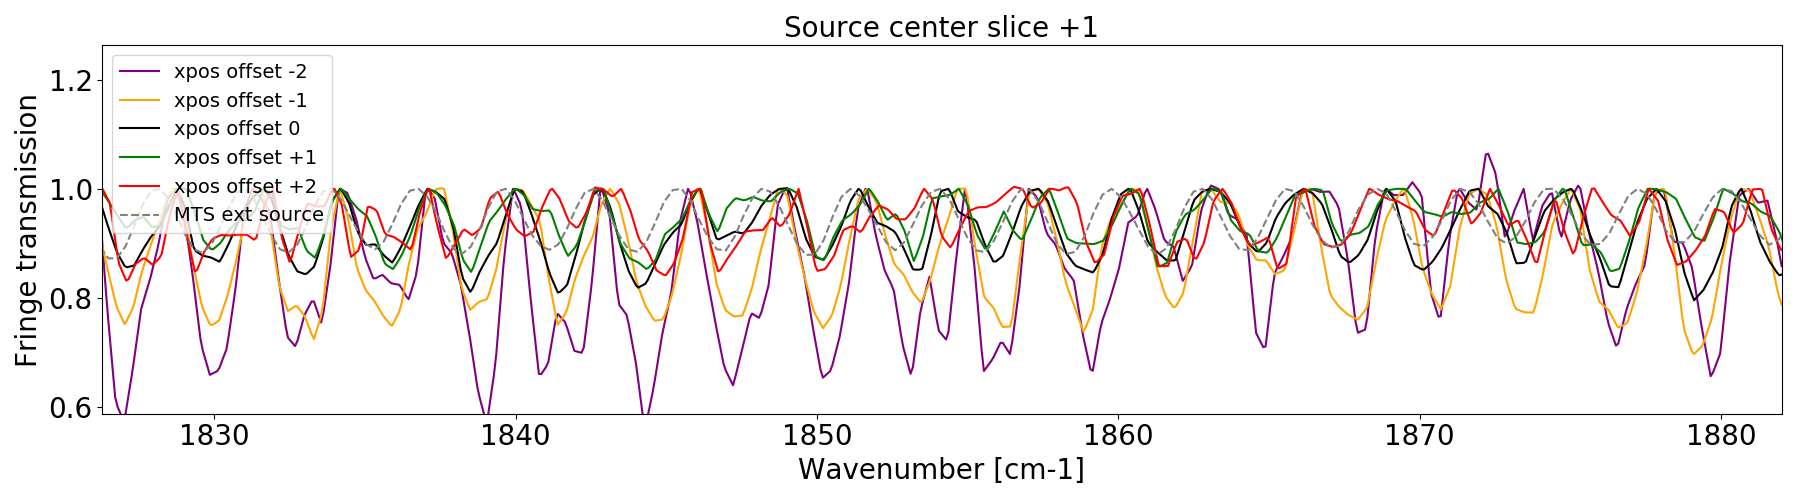

xpos_offset -2
xpos_offset -1
xpos_offset 0
xpos_offset 1
xpos_offset 2


In [35]:
# select pointing and calibrate data
point_source_sci,point_source_bkg = mrsobs.FM_MTS_800K_BB_MRS_OPT_01_raster(lvl2path,pointing='P37') # mrsobs.FM_MTS_800K_BB_MRS_OPT_01_raster(lvl2path,pointing='P1')
point_source_bkgsubtr = point_source_sci-point_source_bkg
point_source_oddevencorr = funcs.OddEvenRowSignalCorrection(point_source_bkgsubtr)

fringe_transm_img = np.zeros((1024,1032))

plt.figure(figsize=(18,5))
plt.title('Source center slice -1')
colors = ['purple','orange','k','g','r']
counter = -1
for xpos_offset in [-2,-1,0,1,2]:
    print "xpos_offset {}".format(xpos_offset)
    counter +=1
    color = colors[counter]
    
    ypos,xpos = funcs.detpixel_trace_compactsource(point_source_oddevencorr,band,d2cMaps,offset_slice=-1)

    while len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) !=0:
        xpos[lambdaMap[ypos,xpos+xpos_offset]==0]+=1

    wavl = lambdaMap[ypos,xpos+xpos_offset]
    wvnr = np.flipud(10000./wavl)
    assert len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) ==0,'Check wavelength array for zeros!'

    nFringes = 0.1710 * 2. * (wvnr[-1]-wvnr[0])
    nPix = 1024.
    #----------
    signal = point_source_oddevencorr[ypos,xpos+xpos_offset]
    discont_idxs = np.where(np.diff(xpos)!=0)[0]
    for i in range(len(discont_idxs)-2):
        if discont_idxs[i+1]-discont_idxs[i] < 20:
            signal[discont_idxs[i]:discont_idxs[i+1]+1] = 0
    sel_discont_wvl = discont_idxs[np.where(np.diff(discont_idxs) >2.*nPix/nFringes)[0]]
    #-------------
    arr  = np.flipud(signal)

    new_wvnr = np.linspace(wvnr[~np.isinf(wvnr)][0],wvnr[~np.isinf(wvnr)][-1],4*nPix)
    interp = scp_interpolate.interp1d(wvnr,arr)
    new_arr = interp(new_wvnr)

    peaks = funcs.norm_fringe(new_arr,min_dist=4*nPix/nFringes/1.6,k=1,ext=0)

    sel_discont_wvnr = np.flipud(len(wavl)-sel_discont_wvl-2)
    if sel_discont_wvnr[0] !=0:
        sel_discont_wvnr = np.concatenate([np.array([0]),sel_discont_wvnr])
    #----------------
    save_wvnr,save_transm = [],[]
    for i in range(len(sel_discont_wvnr)-1):
        idx1,idx2 = funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i]]),funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i+1]])
        if np.mean(new_arr[idx1:idx2][~np.isnan(new_arr[idx1:idx2])]) == 0.:
            continue
        norm_fringe = funcs.norm_fringe(new_arr[idx1:idx2],min_dist=4*nPix/nFringes/1.6,k=1,ext=0)
        save_wvnr.extend(new_wvnr[idx1:idx2])
        save_transm.extend(norm_fringe[0]/norm_fringe[2])
        plt.plot(new_wvnr[idx1:idx2],norm_fringe[0]/norm_fringe[2],color)
    save_wvnr,save_transm = np.array(save_wvnr),np.array(save_transm)
    interp_transm = scp_interpolate.interp1d(save_wvnr,save_transm)
    sel = (wvnr>save_wvnr.min()) & (wvnr<save_wvnr.max())
    fringe_transm_img[ypos[sel],(xpos+xpos_offset)[sel]] = interp_transm(wvnr[sel])
#--------
ext_source_norm_fringe = funcs.norm_fringe(ext_source_oddevencorr[ypos,xpos],min_dist=2)
plt.plot(np.flipud(10000./lambdaMap[ypos,xpos]),np.flipud(ext_source_norm_fringe[0]/ext_source_norm_fringe[2]),'gray',linestyle='dashed')
#--------
plt.ylim(0.6,1.05)
plt.xlabel('Wavenumber [cm-1]')
plt.ylabel('Fringe transmission')
legend_elements = [Line2D([0],[0],color='purple',label='xpos offset -2'),
                   Line2D([0],[0],color='orange',label='xpos offset -1'),
                   Line2D([0],[0],color='k',label='xpos offset 0'),
                   Line2D([0],[0],color='green',label='xpos offset +1'),
                   Line2D([0],[0],color='red',label='xpos offset +2'),
                   Line2D([0],[0],color='gray',linestyle='dashed',label='MTS ext source')]
plt.legend(handles=legend_elements)
plt.tight_layout()

plt.figure(figsize=(18,5))
plt.title('Source center slice')
counter = -1
for xpos_offset in [-2,-1,0,1,2]:
    print "xpos_offset {}".format(xpos_offset)
    counter +=1
    color = colors[counter]
    
    ypos,xpos = funcs.detpixel_trace_compactsource(point_source_oddevencorr,band,d2cMaps,offset_slice=0)

    while len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) !=0:
        xpos[lambdaMap[ypos,xpos+xpos_offset]==0]+=1

    wavl = lambdaMap[ypos,xpos+xpos_offset]
    wvnr = np.flipud(10000./wavl)
    assert len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) ==0,'Check wavelength array for zeros!'

    nFringes = 0.1710 * 2. * (wvnr[-1]-wvnr[0])
    nPix = 1024.
    #----------
    signal = point_source_oddevencorr[ypos,xpos+xpos_offset]
    discont_idxs = np.where(np.diff(xpos)!=0)[0]
    for i in range(len(discont_idxs)-2):
        if discont_idxs[i+1]-discont_idxs[i] < 20:
            signal[discont_idxs[i]:discont_idxs[i+1]+1] = 0
    sel_discont_wvl = discont_idxs[np.where(np.diff(discont_idxs) >2.*nPix/nFringes)[0]]
    #-------------
    arr  = np.flipud(signal)

    new_wvnr = np.linspace(wvnr[~np.isinf(wvnr)][0],wvnr[~np.isinf(wvnr)][-1],4*nPix)
    interp = scp_interpolate.interp1d(wvnr,arr)
    new_arr = interp(new_wvnr)

    peaks = funcs.norm_fringe(new_arr,min_dist=4*nPix/nFringes/1.6,k=1,ext=0)

    sel_discont_wvnr = np.flipud(len(wavl)-sel_discont_wvl-2)
    if sel_discont_wvnr[0] !=0:
        sel_discont_wvnr = np.concatenate([np.array([0]),sel_discont_wvnr])
    #----------------
    save_wvnr,save_transm = [],[]
    for i in range(len(sel_discont_wvnr)-1):
        idx1,idx2 = funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i]]),funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i+1]])
        if np.mean(new_arr[idx1:idx2][~np.isnan(new_arr[idx1:idx2])]) == 0.:
            continue
        norm_fringe = funcs.norm_fringe(new_arr[idx1:idx2],min_dist=4*nPix/nFringes/1.6,k=1,ext=0)
        save_wvnr.extend(new_wvnr[idx1:idx2])
        save_transm.extend(norm_fringe[0]/norm_fringe[2])
        plt.plot(new_wvnr[idx1:idx2],norm_fringe[0]/norm_fringe[2],color)
    save_wvnr,save_transm = np.array(save_wvnr),np.array(save_transm)
    interp_transm = scp_interpolate.interp1d(save_wvnr,save_transm)
    sel = (wvnr>save_wvnr.min()) & (wvnr<save_wvnr.max())
    fringe_transm_img[ypos[sel],(xpos+xpos_offset)[sel]] = interp_transm(wvnr[sel])
#--------
ext_source_norm_fringe = funcs.norm_fringe(ext_source_oddevencorr[ypos,xpos],min_dist=2)
plt.plot(np.flipud(10000./lambdaMap[ypos,xpos]),np.flipud(ext_source_norm_fringe[0]/ext_source_norm_fringe[2]),'gray',linestyle='dashed')
#--------
plt.ylim(0.6,1.05)
plt.xlabel('Wavenumber [cm-1]')
plt.ylabel('Fringe transmission')
legend_elements = [Line2D([0],[0],color='purple',label='xpos offset -2'),
                   Line2D([0],[0],color='orange',label='xpos offset -1'),
                   Line2D([0],[0],color='k',label='xpos offset 0'),
                   Line2D([0],[0],color='green',label='xpos offset +1'),
                   Line2D([0],[0],color='red',label='xpos offset +2'),
                   Line2D([0],[0],color='gray',linestyle='dashed',label='MTS ext source')]
plt.legend(handles=legend_elements)
plt.tight_layout()

plt.figure(figsize=(18,5))
plt.title('Source center slice +1')
counter = -1
for xpos_offset in [-2,-1,0,1,2]:
    print "xpos_offset {}".format(xpos_offset)
    counter +=1
    color = colors[counter]
    
    ypos,xpos = funcs.detpixel_trace_compactsource(point_source_oddevencorr,band,d2cMaps,offset_slice=1)

    while len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) !=0:
        xpos[lambdaMap[ypos,xpos+xpos_offset]==0]+=1

    wavl = lambdaMap[ypos,xpos+xpos_offset]
    wvnr = np.flipud(10000./wavl)
    assert len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) ==0,'Check wavelength array for zeros!'

    nFringes = 0.1710 * 2. * (wvnr[-1]-wvnr[0])
    nPix = 1024.
    #----------
    signal = point_source_oddevencorr[ypos,xpos+xpos_offset]
    discont_idxs = np.where(np.diff(xpos)!=0)[0]
    for i in range(len(discont_idxs)-2):
        if discont_idxs[i+1]-discont_idxs[i] < 20:
            signal[discont_idxs[i]:discont_idxs[i+1]+1] = 0
    sel_discont_wvl = discont_idxs[np.where(np.diff(discont_idxs) >2.*nPix/nFringes)[0]]
    #-------------
    arr  = np.flipud(signal)

    new_wvnr = np.linspace(wvnr[~np.isinf(wvnr)][0],wvnr[~np.isinf(wvnr)][-1],4*nPix)
    interp = scp_interpolate.interp1d(wvnr,arr)
    new_arr = interp(new_wvnr)

    peaks = funcs.norm_fringe(new_arr,min_dist=4*nPix/nFringes/1.6,k=1,ext=0)

    sel_discont_wvnr = np.flipud(len(wavl)-sel_discont_wvl-2)
    if sel_discont_wvnr[0] !=0:
        sel_discont_wvnr = np.concatenate([np.array([0]),sel_discont_wvnr])
    #----------------
    save_wvnr,save_transm = [],[]
    for i in range(len(sel_discont_wvnr)-1):
        idx1,idx2 = funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i]]),funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i+1]])
        if np.mean(new_arr[idx1:idx2][~np.isnan(new_arr[idx1:idx2])]) == 0.:
            continue
        norm_fringe = funcs.norm_fringe(new_arr[idx1:idx2],min_dist=4*nPix/nFringes/1.6,k=1,ext=0)
        save_wvnr.extend(new_wvnr[idx1:idx2])
        save_transm.extend(norm_fringe[0]/norm_fringe[2])
        plt.plot(new_wvnr[idx1:idx2],norm_fringe[0]/norm_fringe[2],color)
    save_wvnr,save_transm = np.array(save_wvnr),np.array(save_transm)
    interp_transm = scp_interpolate.interp1d(save_wvnr,save_transm)
    sel = (wvnr>save_wvnr.min()) & (wvnr<save_wvnr.max())
    fringe_transm_img[ypos[sel],(xpos+xpos_offset)[sel]] = interp_transm(wvnr[sel])
#--------
ext_source_norm_fringe = funcs.norm_fringe(ext_source_oddevencorr[ypos,xpos],min_dist=2)
plt.plot(np.flipud(10000./lambdaMap[ypos,xpos]),np.flipud(ext_source_norm_fringe[0]/ext_source_norm_fringe[2]),'gray',linestyle='dashed')
#--------
plt.ylim(0.6,1.05)
plt.xlabel('Wavenumber [cm-1]')
plt.ylabel('Fringe transmission')
legend_elements = [Line2D([0],[0],color='purple',label='xpos offset -2'),
                   Line2D([0],[0],color='orange',label='xpos offset -1'),
                   Line2D([0],[0],color='k',label='xpos offset 0'),
                   Line2D([0],[0],color='green',label='xpos offset +1'),
                   Line2D([0],[0],color='red',label='xpos offset +2'),
                   Line2D([0],[0],color='gray',linestyle='dashed',label='MTS ext source')]
plt.legend(handles=legend_elements)
plt.tight_layout()

<IPython.core.display.Javascript object>


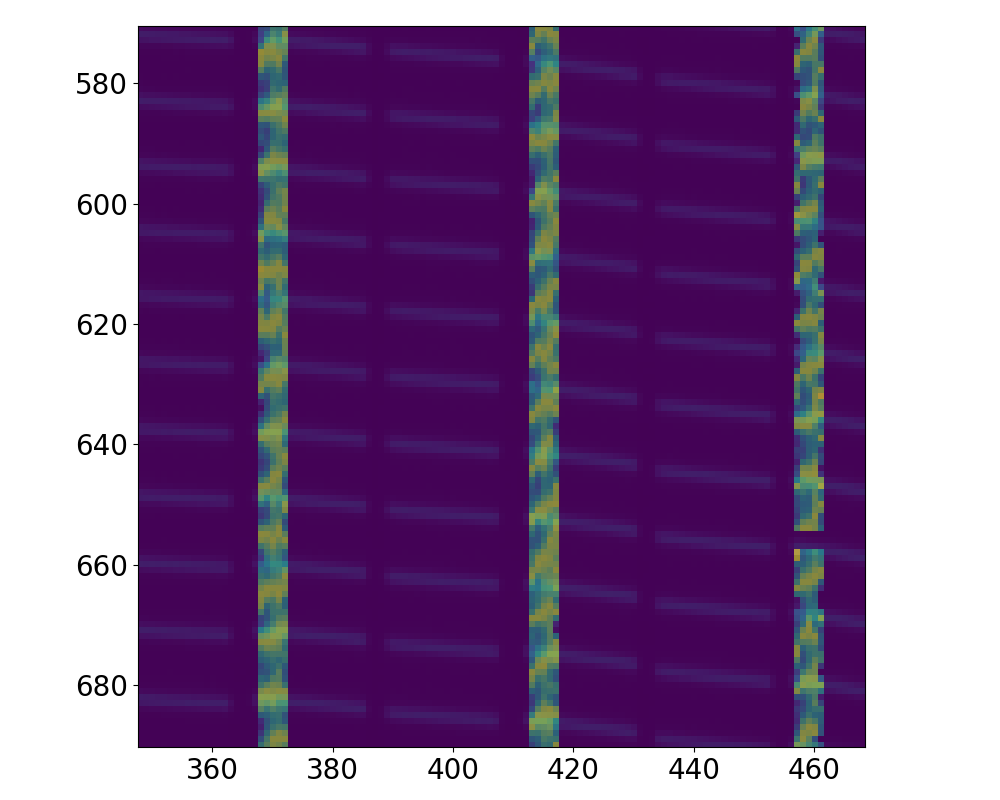

In [34]:
plt.figure(figsize=(10,8))
plt.imshow(fringe_transm_img,vmin=0.6,vmax=1.05,zorder=0)
plt.imshow(ext_etal_source_sci*20.,alpha=0.4,zorder=1)
plt.tight_layout()

<IPython.core.display.Javascript object>


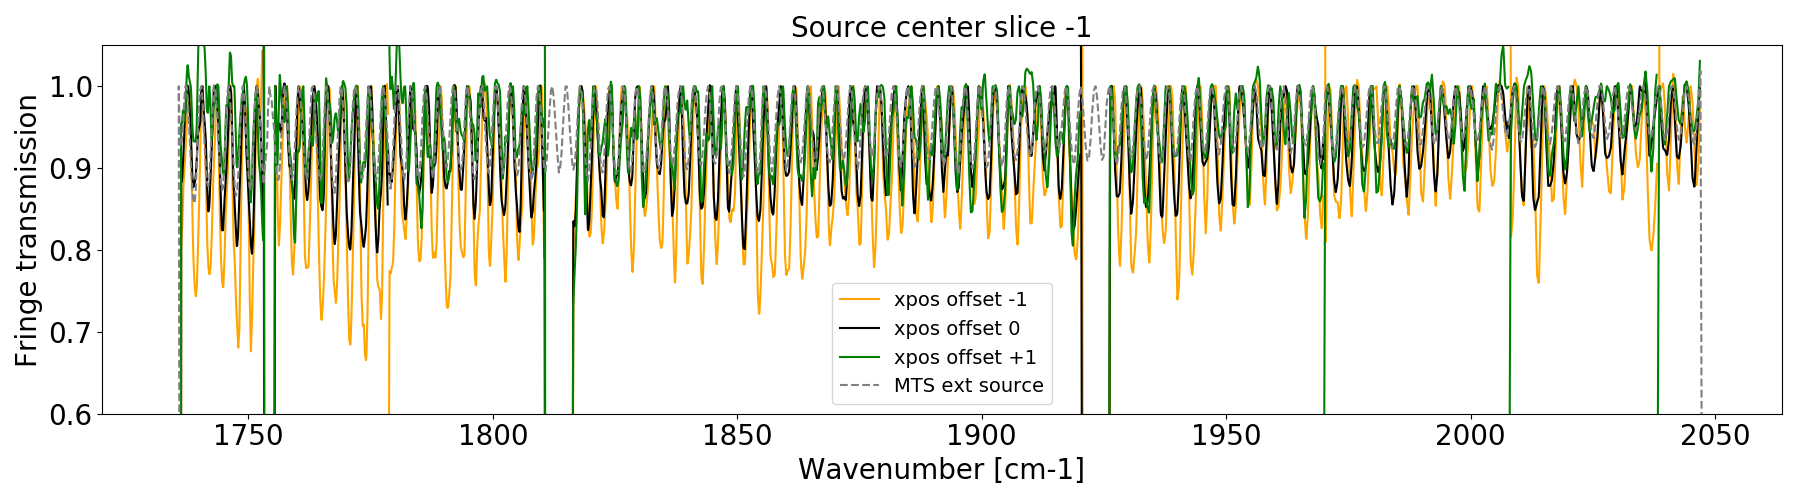

<IPython.core.display.Javascript object>


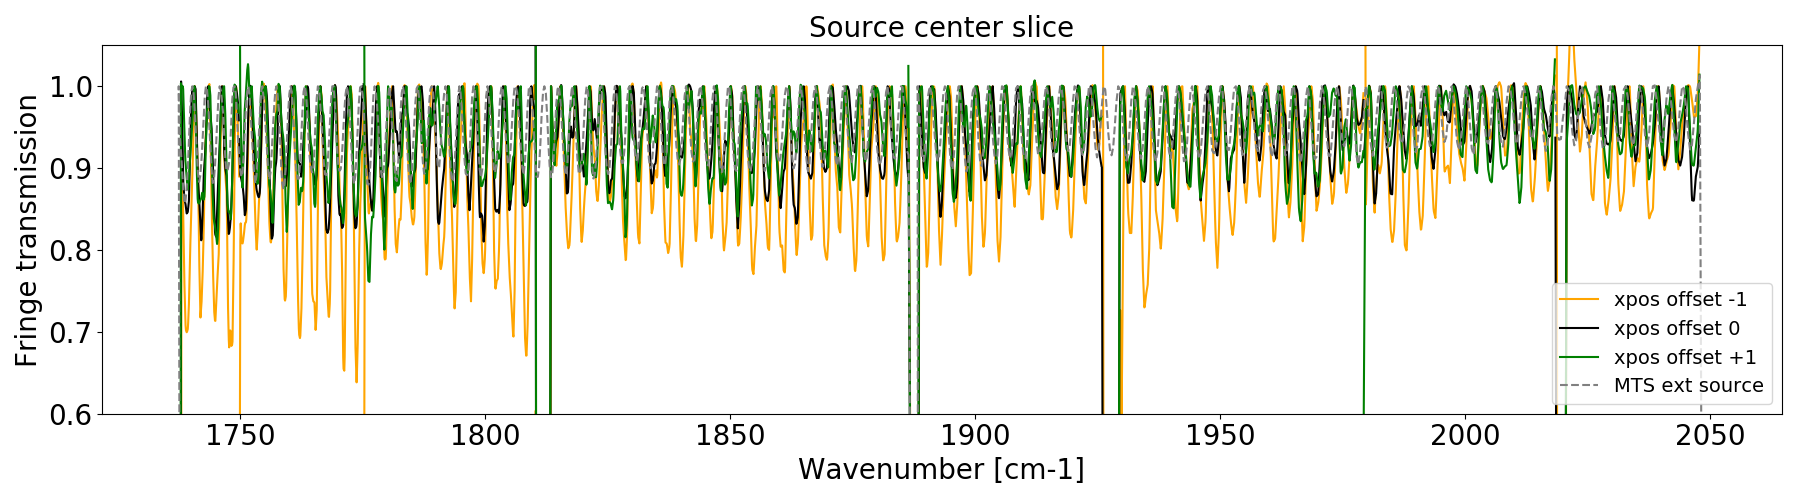

<IPython.core.display.Javascript object>


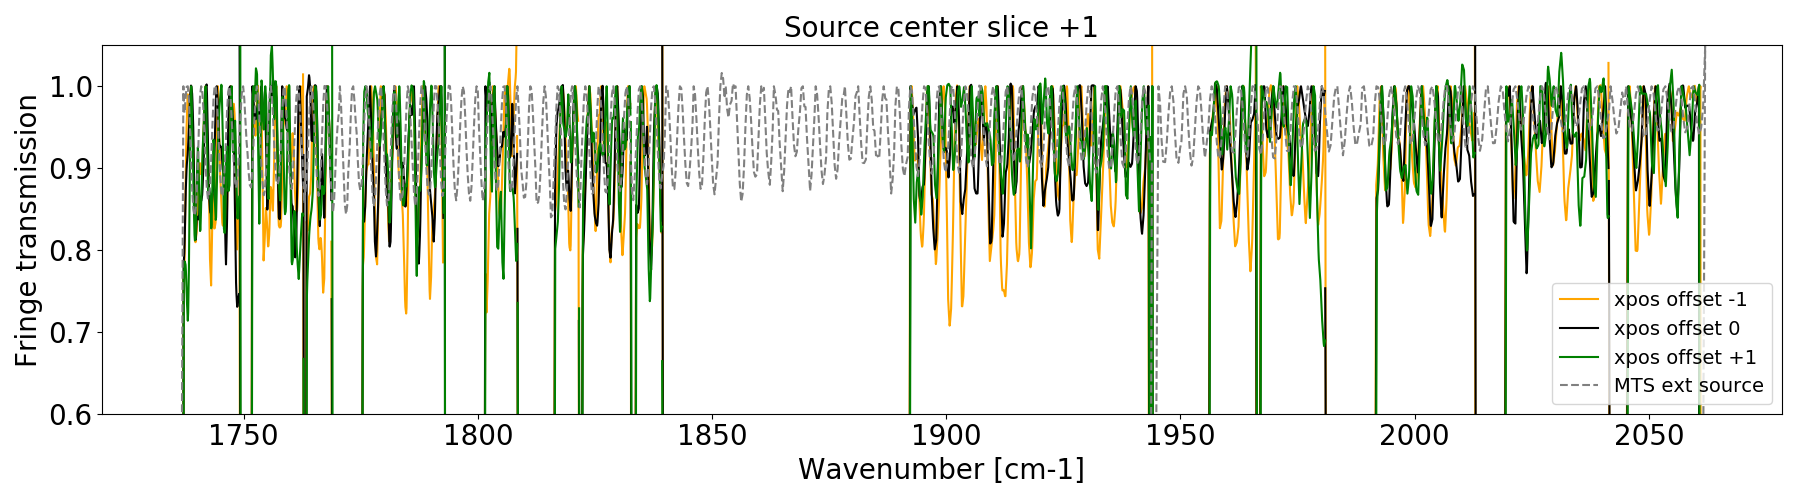

In [46]:
# select pointing and calibrate data
point_source_sci,point_source_bkg = mrsobs.FM_MTS_800K_BB_MRS_OPT_01_raster(lvl2path,pointing='P30') # mrsobs.FM_MTS_800K_BB_MRS_OPT_01_raster(lvl2path,pointing='P1')
point_source_bkgsubtr = point_source_sci-point_source_bkg
point_source_oddevencorr = funcs.OddEvenRowSignalCorrection(point_source_bkgsubtr)

plt.figure(figsize=(18,5))
plt.title('Source center slice -1')
colors = ['purple','orange','k','g','r']
counter = 0
for xpos_offset in [-1,0,1]:
    counter +=1
    color = colors[counter]
    
    ypos,xpos = funcs.detpixel_trace_compactsource(point_source_oddevencorr,band,d2cMaps,offset_slice=-1)

    if len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) !=0:
        xpos[lambdaMap[ypos,xpos+xpos_offset]==0]+=1
    if len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) !=0:
        xpos[lambdaMap[ypos,xpos+xpos_offset]==0]+=1

    wavl = lambdaMap[ypos,xpos+xpos_offset]
    wvnr = np.flipud(10000./wavl)
    assert len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) ==0,'Check wavelength array for zeros!'

    nFringes = 0.1710 * 2. * (wvnr[-1]-wvnr[0])
    nPix = 1024.
    #----------
    signal = point_source_oddevencorr[ypos,xpos+xpos_offset]
    discont_idxs = np.where(np.diff(xpos)!=0)[0]
    for i in range(len(discont_idxs)-2):
        if discont_idxs[i+1]-discont_idxs[i] < 20:
            signal[discont_idxs[i]:discont_idxs[i+1]+1] = 0
    sel_discont_wvl = discont_idxs[np.where(np.diff(discont_idxs) >2.*nPix/nFringes)[0]]
    #-------------
    arr  = np.flipud(signal)

    new_wvnr = np.linspace(wvnr[~np.isinf(wvnr)][0],wvnr[~np.isinf(wvnr)][-1],4*nPix)
    interp = scp_interpolate.interp1d(wvnr,arr)
    new_arr = interp(new_wvnr)

    peaks = funcs.norm_fringe(new_arr,min_dist=4*nPix/nFringes/1.6,k=1,ext=0)

    sel_discont_wvnr = np.flipud(len(wavl)-sel_discont_wvl-2)
    if sel_discont_wvnr[0] !=0:
        sel_discont_wvnr = np.concatenate([np.array([0]),sel_discont_wvnr])
    wavl_array = np.zeros(4*1024)
    fringe_transm = np.zeros(4*1024)
    #----------------
    save_wvnr,save_transm = [],[]
    for i in range(len(sel_discont_wvnr)-1):
        idx1,idx2 = funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i]]),funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i+1]])
        norm_fringe = funcs.norm_fringe(new_arr[idx1:idx2],min_dist=4*nPix/nFringes/1.6,k=1,ext=0)
        save_wvnr.extend(new_wvnr[idx1:idx2])
        save_transm.extend(norm_fringe[0]/norm_fringe[2])
        plt.plot(new_wvnr[idx1:idx2],norm_fringe[0]/norm_fringe[2],color)
    save_wvnr,save_transm = np.array(save_wvnr),np.array(save_transm)
    interp_transm = scp_interpolate.interp1d(save_wvnr,save_transm)
    sel = (wvnr>save_wvnr.min()) & (wvnr<save_wvnr.max())
    fringe_img[ypos[sel],(xpos+xpos_offset)[sel]] = interp_transm(wvnr[sel])
#--------
ext_source_norm_fringe = funcs.norm_fringe(ext_source_oddevencorr[ypos,xpos],min_dist=2)
plt.plot(np.flipud(10000./lambdaMap[ypos,xpos]),np.flipud(ext_source_norm_fringe[0]/ext_source_norm_fringe[2]),'gray',linestyle='dashed')
#--------
plt.ylim(0.6,1.05)
plt.xlabel('Wavenumber [cm-1]')
plt.ylabel('Fringe transmission')
legend_elements = [Line2D([0],[0],color='orange',label='xpos offset -1'),
                   Line2D([0],[0],color='k',label='xpos offset 0'),
                   Line2D([0],[0],color='green',label='xpos offset +1'),
                   Line2D([0],[0],color='gray',linestyle='dashed',label='MTS ext source')]
plt.legend(handles=legend_elements)
plt.tight_layout()

plt.figure(figsize=(18,5))
plt.title('Source center slice')
counter = 0
for xpos_offset in [-1,0,1]:
    counter +=1
    color = colors[counter]
    
    ypos,xpos = funcs.detpixel_trace_compactsource(point_source_oddevencorr,band,d2cMaps,offset_slice=0)

    if len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) !=0:
        xpos[lambdaMap[ypos,xpos+xpos_offset]==0]+=1
    if len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) !=0:
        xpos[lambdaMap[ypos,xpos+xpos_offset]==0]+=1

    wavl = lambdaMap[ypos,xpos+xpos_offset]
    wvnr = np.flipud(10000./wavl)
    assert len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) ==0,'Check wavelength array for zeros!'

    nFringes = 0.1710 * 2. * (wvnr[-1]-wvnr[0])
    nPix = 1024.
    #----------
    signal = point_source_oddevencorr[ypos,xpos+xpos_offset]
    discont_idxs = np.where(np.diff(xpos)!=0)[0]
    for i in range(len(discont_idxs)-2):
        if discont_idxs[i+1]-discont_idxs[i] < 20:
            signal[discont_idxs[i]:discont_idxs[i+1]+1] = 0
    sel_discont_wvl = discont_idxs[np.where(np.diff(discont_idxs) >2.*nPix/nFringes)[0]]
    #-------------
    arr  = np.flipud(signal)

    new_wvnr = np.linspace(wvnr[~np.isinf(wvnr)][0],wvnr[~np.isinf(wvnr)][-1],4*nPix)
    interp = scp_interpolate.interp1d(wvnr,arr)
    new_arr = interp(new_wvnr)

    peaks = funcs.norm_fringe(new_arr,min_dist=4*nPix/nFringes/1.6,k=1,ext=0)

    sel_discont_wvnr = np.flipud(len(wavl)-sel_discont_wvl-2)
    if sel_discont_wvnr[0] !=0:
        sel_discont_wvnr = np.concatenate([np.array([0]),sel_discont_wvnr])
    #----------------
    wavl_array = np.zeros(4*1024)
    fringe_transm = np.zeros(4*1024)
    #----------------
    save_wvnr,save_transm = [],[]
    for i in range(len(sel_discont_wvnr)-1):
        idx1,idx2 = funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i]]),funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i+1]])
        norm_fringe = funcs.norm_fringe(new_arr[idx1:idx2],min_dist=4*nPix/nFringes/1.6,k=1,ext=0)
        save_wvnr.extend(new_wvnr[idx1:idx2])
        save_transm.extend(norm_fringe[0]/norm_fringe[2])
        plt.plot(new_wvnr[idx1:idx2],norm_fringe[0]/norm_fringe[2],color)
    save_wvnr,save_transm = np.array(save_wvnr),np.array(save_transm)
    interp_transm = scp_interpolate.interp1d(save_wvnr,save_transm)
    sel = (wvnr>save_wvnr.min()) & (wvnr<save_wvnr.max())
    fringe_img[ypos[sel],(xpos+xpos_offset)[sel]] = interp_transm(wvnr[sel])
#--------
ext_source_norm_fringe = funcs.norm_fringe(ext_source_oddevencorr[ypos,xpos],min_dist=2)
plt.plot(np.flipud(10000./lambdaMap[ypos,xpos]),np.flipud(ext_source_norm_fringe[0]/ext_source_norm_fringe[2]),'gray',linestyle='dashed')
#--------
plt.ylim(0.6,1.05)
plt.xlabel('Wavenumber [cm-1]')
plt.ylabel('Fringe transmission')
legend_elements = [Line2D([0],[0],color='orange',label='xpos offset -1'),
                   Line2D([0],[0],color='k',label='xpos offset 0'),
                   Line2D([0],[0],color='green',label='xpos offset +1'),
                   Line2D([0],[0],color='gray',linestyle='dashed',label='MTS ext source')]
plt.legend(handles=legend_elements)
plt.tight_layout()

plt.figure(figsize=(18,5))
plt.title('Source center slice +1')
counter = 0
for xpos_offset in [-1,0,1]:
    counter +=1
    color = colors[counter]
    
    ypos,xpos = funcs.detpixel_trace_compactsource(point_source_oddevencorr,band,d2cMaps,offset_slice=1)

    if len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) !=0:
        xpos[lambdaMap[ypos,xpos+xpos_offset]==0]+=1
    if len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) !=0:
        xpos[lambdaMap[ypos,xpos+xpos_offset]==0]+=1

    wavl = lambdaMap[ypos,xpos+xpos_offset]
    wvnr = np.flipud(10000./wavl)
    assert len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) ==0,'Check wavelength array for zeros!'

    nFringes = 0.1710 * 2. * (wvnr[-1]-wvnr[0])
    nPix = 1024.
    #----------
    signal = point_source_oddevencorr[ypos,xpos+xpos_offset]
    discont_idxs = np.where(np.diff(xpos)!=0)[0]
    for i in range(len(discont_idxs)-2):
        if discont_idxs[i+1]-discont_idxs[i] < 20:
            signal[discont_idxs[i]:discont_idxs[i+1]+1] = 0
    sel_discont_wvl = discont_idxs[np.where(np.diff(discont_idxs) >2.*nPix/nFringes)[0]]
    #-------------
    arr  = np.flipud(signal)

    new_wvnr = np.linspace(wvnr[~np.isinf(wvnr)][0],wvnr[~np.isinf(wvnr)][-1],4*nPix)
    interp = scp_interpolate.interp1d(wvnr,arr)
    new_arr = interp(new_wvnr)

    peaks = funcs.norm_fringe(new_arr,min_dist=4*nPix/nFringes/1.6,k=1,ext=0)

    sel_discont_wvnr = np.flipud(len(wavl)-sel_discont_wvl-2)
    if sel_discont_wvnr[0] !=0:
        sel_discont_wvnr = np.concatenate([np.array([0]),sel_discont_wvnr])
    #----------------
    wavl_array = np.zeros(4*1024)
    fringe_transm = np.zeros(4*1024)
    #----------------
    save_wvnr,save_transm = [],[]
    for i in range(len(sel_discont_wvnr)-1):
        idx1,idx2 = funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i]]),funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i+1]])
        norm_fringe = funcs.norm_fringe(new_arr[idx1:idx2],min_dist=4*nPix/nFringes/1.6,k=1,ext=0)
        save_wvnr.extend(new_wvnr[idx1:idx2])
        save_transm.extend(norm_fringe[0]/norm_fringe[2])
        plt.plot(new_wvnr[idx1:idx2],norm_fringe[0]/norm_fringe[2],color)
    save_wvnr,save_transm = np.array(save_wvnr),np.array(save_transm)
    interp_transm = scp_interpolate.interp1d(save_wvnr,save_transm)
    sel = (wvnr>save_wvnr.min()) & (wvnr<save_wvnr.max())
    fringe_img[ypos[sel],(xpos+xpos_offset)[sel]] = interp_transm(wvnr[sel])
#--------
ext_source_norm_fringe = funcs.norm_fringe(ext_source_oddevencorr[ypos,xpos],min_dist=2)
plt.plot(np.flipud(10000./lambdaMap[ypos,xpos]),np.flipud(ext_source_norm_fringe[0]/ext_source_norm_fringe[2]),'gray',linestyle='dashed')
#--------
plt.ylim(0.6,1.05)
plt.xlabel('Wavenumber [cm-1]')
plt.ylabel('Fringe transmission')
legend_elements = [Line2D([0],[0],color='orange',label='xpos offset -1'),
                   Line2D([0],[0],color='k',label='xpos offset 0'),
                   Line2D([0],[0],color='green',label='xpos offset +1'),
                   Line2D([0],[0],color='gray',linestyle='dashed',label='MTS ext source')]
plt.legend(handles=legend_elements)
plt.tight_layout()

<IPython.core.display.Javascript object>


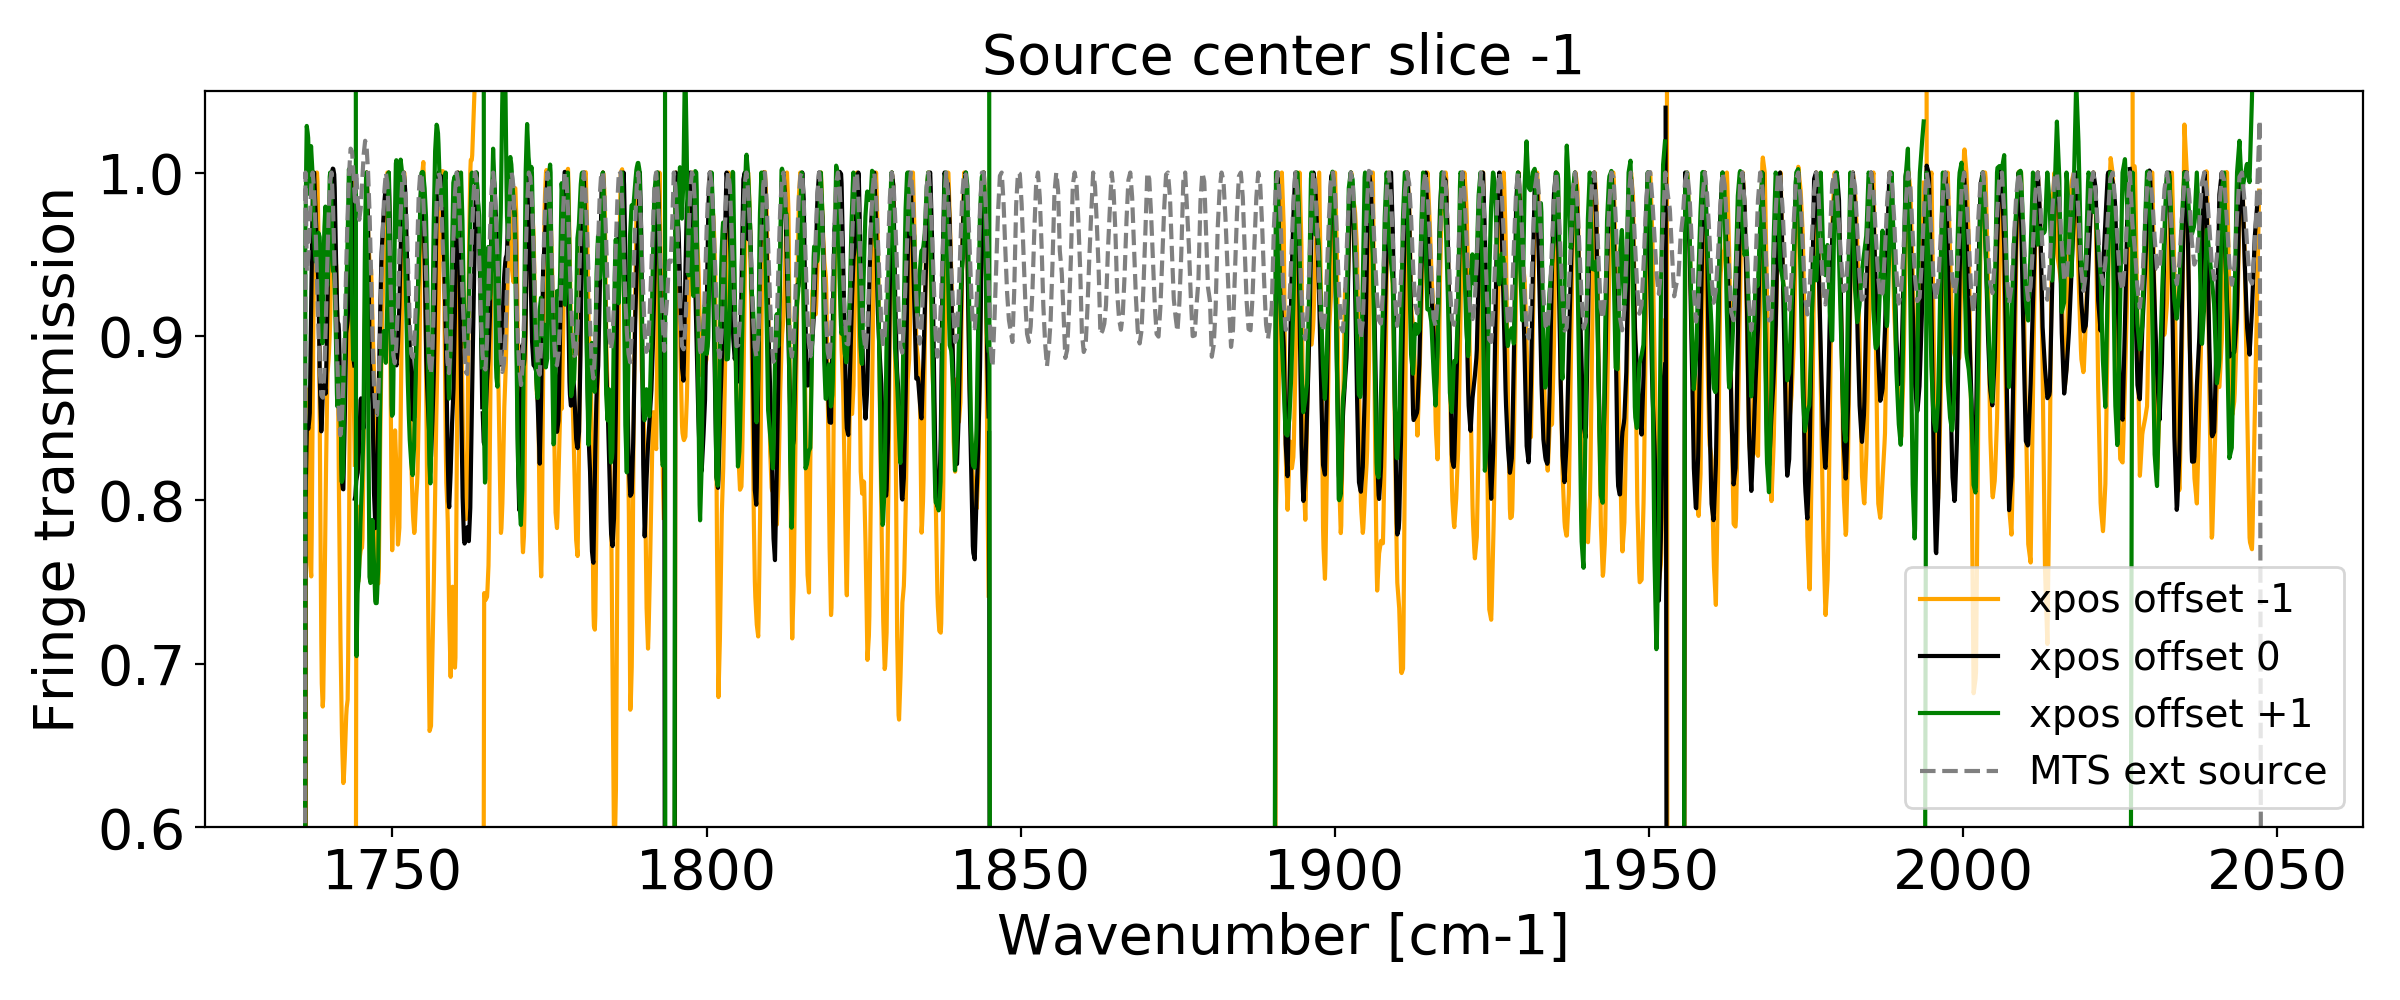

<IPython.core.display.Javascript object>


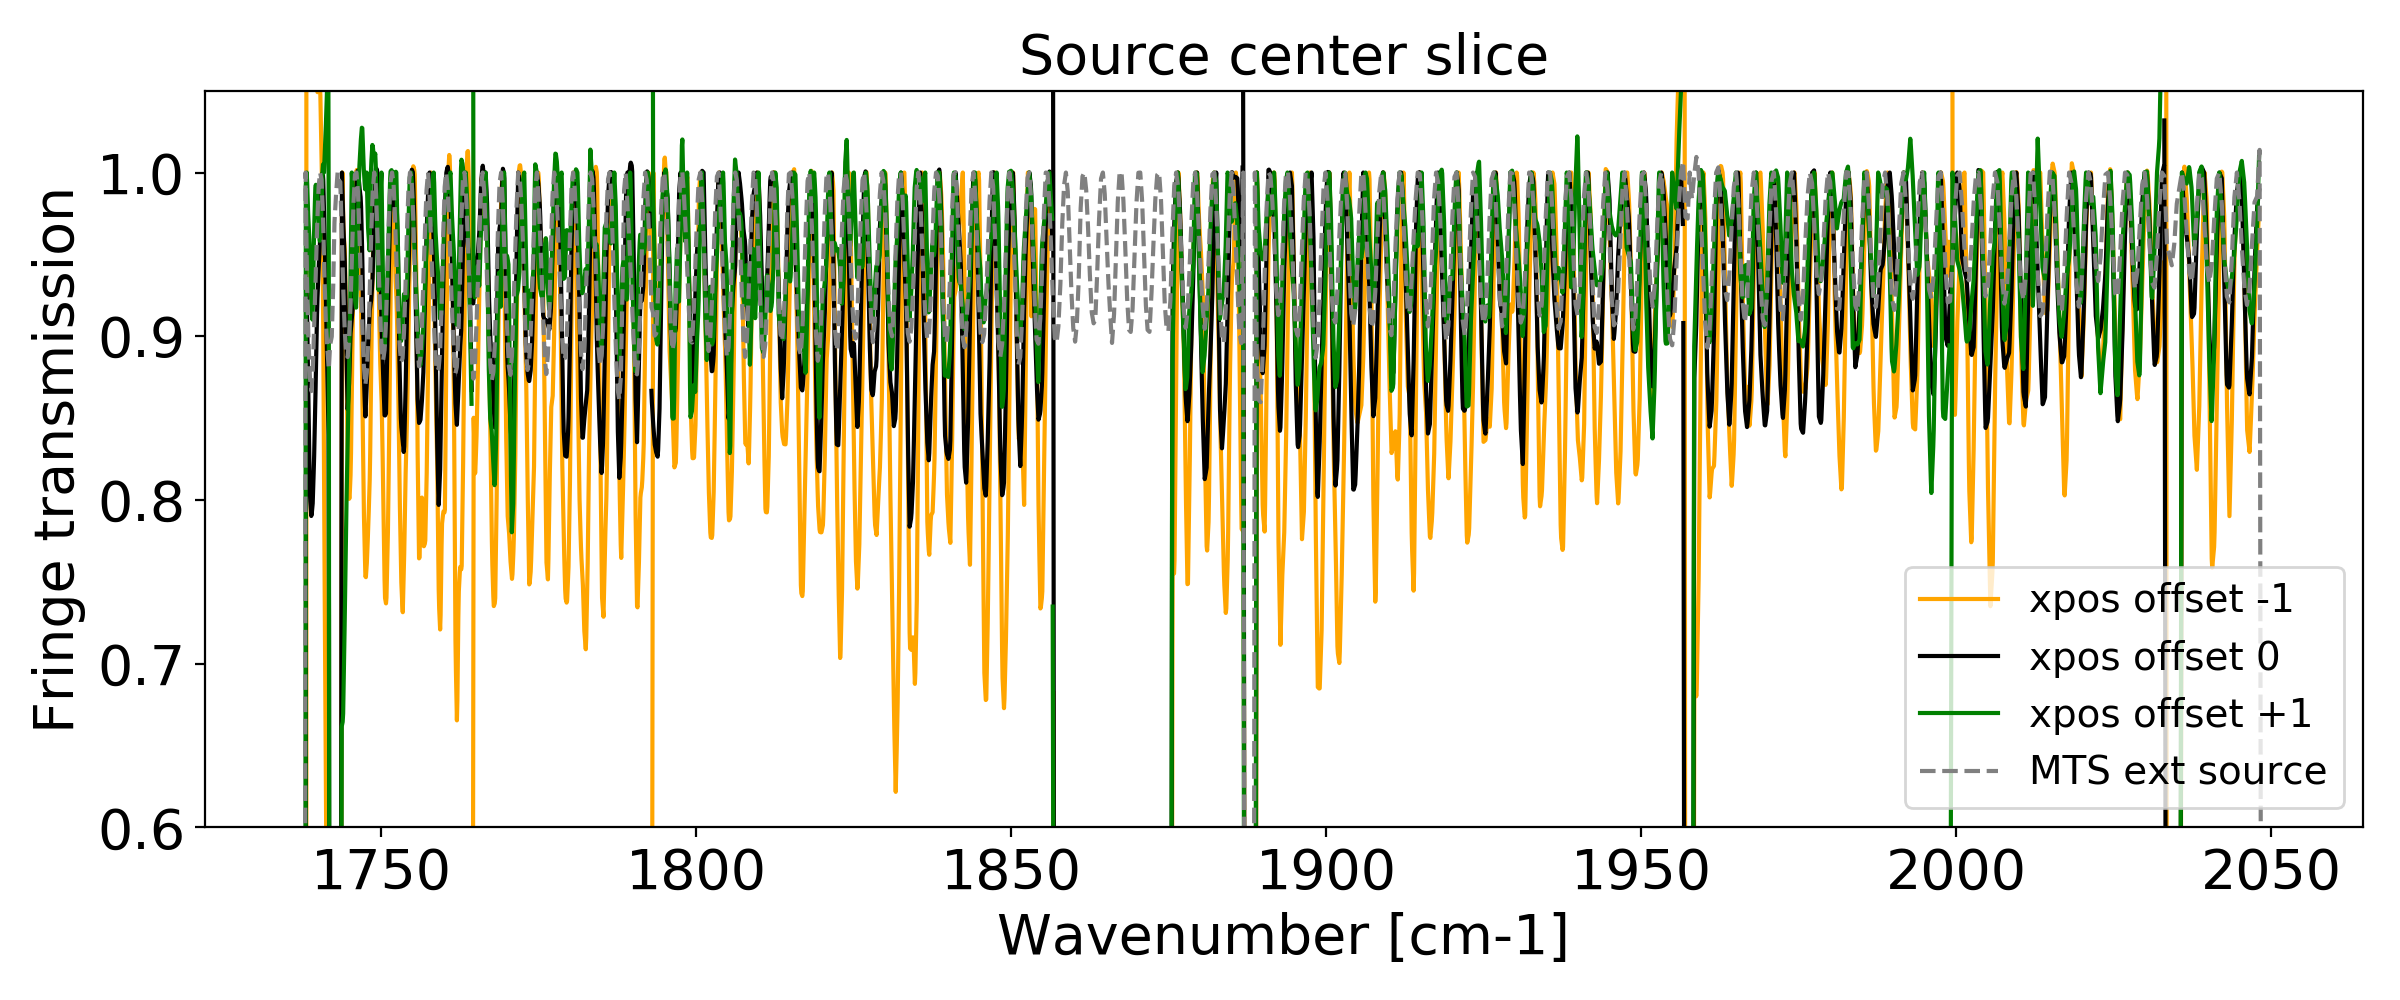

<IPython.core.display.Javascript object>


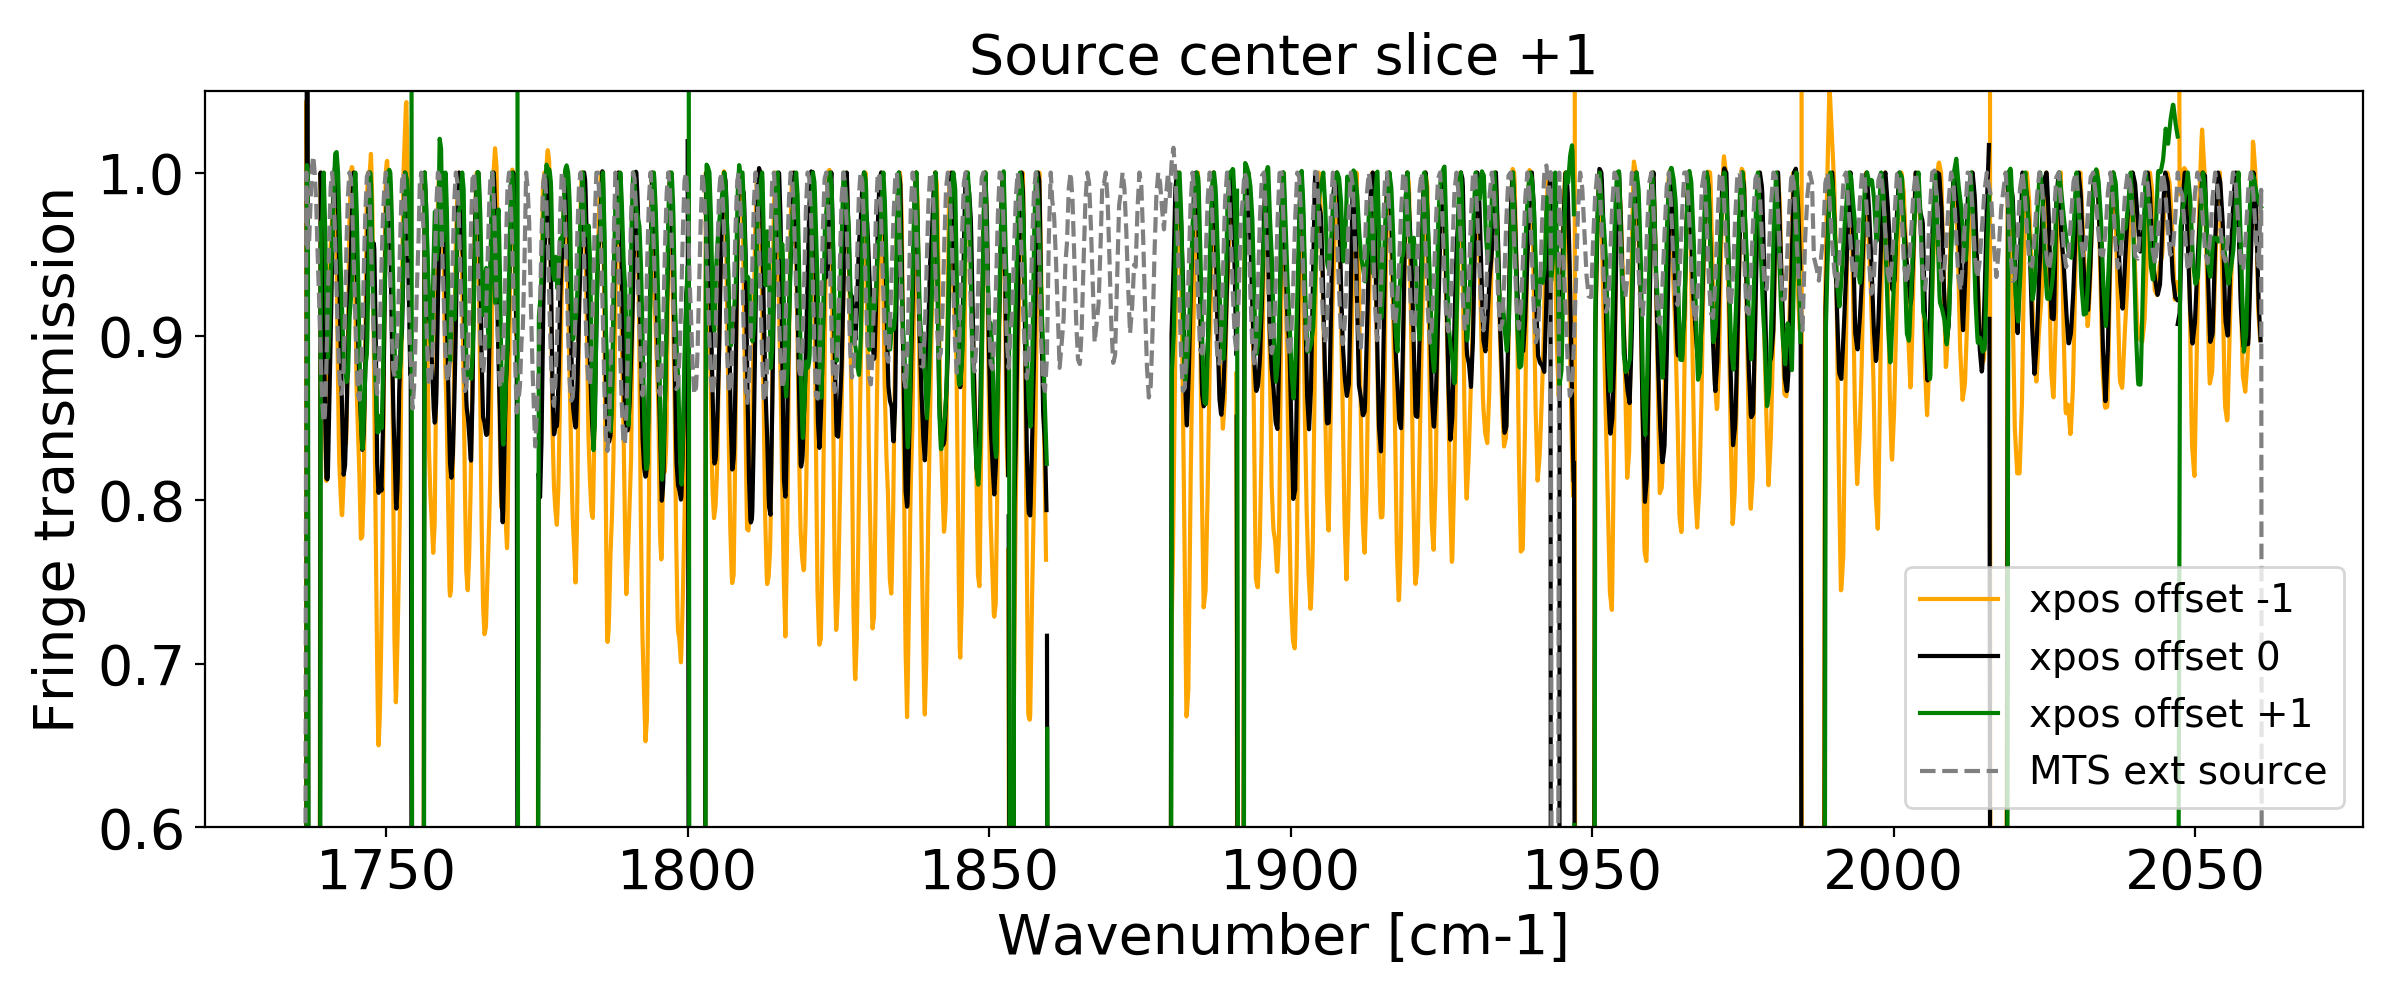

In [33]:
# select pointing and calibrate data
point_source_sci,point_source_bkg = mrsobs.FM_MTS_800K_BB_MRS_OPT_01_raster(lvl2path,pointing='P31') # mrsobs.FM_MTS_800K_BB_MRS_OPT_01_raster(lvl2path,pointing='P1')
point_source_bkgsubtr = point_source_sci-point_source_bkg
point_source_oddevencorr = funcs.OddEvenRowSignalCorrection(point_source_bkgsubtr)

plt.figure(figsize=(12,5))
plt.title('Source center slice -1')
colors = ['purple','orange','k','g','r']
counter = 0
for xpos_offset in [-1,0,1]:
    counter +=1
    color = colors[counter]
    
    ypos,xpos = funcs.detpixel_trace_compactsource(point_source_oddevencorr,band,d2cMaps,offset_slice=-1)

    if len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) !=0:
        xpos[lambdaMap[ypos,xpos+xpos_offset]==0]+=1
    if len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) !=0:
        xpos[lambdaMap[ypos,xpos+xpos_offset]==0]+=1

    wavl = lambdaMap[ypos,xpos+xpos_offset]
    wvnr = np.flipud(10000./wavl)
    assert len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) ==0,'Check wavelength array for zeros!'

    nFringes = 0.1710 * 2. * (wvnr[-1]-wvnr[0])
    nPix = 1024.
    #----------
    signal = point_source_oddevencorr[ypos,xpos+xpos_offset]
    discont_idxs = np.where(np.diff(xpos)!=0)[0]
    for i in range(len(discont_idxs)-2):
        if discont_idxs[i+1]-discont_idxs[i] < 20:
            signal[discont_idxs[i]:discont_idxs[i+1]+1] = 0
    sel_discont_wvl = discont_idxs[np.where(np.diff(discont_idxs) >2.*nPix/nFringes)[0]]
    #-------------
    arr  = np.flipud(signal)

    new_wvnr = np.linspace(wvnr[~np.isinf(wvnr)][0],wvnr[~np.isinf(wvnr)][-1],4*nPix)
    interp = scp_interpolate.interp1d(wvnr,arr)
    new_arr = interp(new_wvnr)

    peaks = funcs.norm_fringe(new_arr,min_dist=4*nPix/nFringes/1.6,k=1,ext=0)

    sel_discont_wvnr = np.flipud(len(wavl)-sel_discont_wvl-2)
    if sel_discont_wvnr[0] !=0:
        sel_discont_wvnr = np.concatenate([np.array([0]),sel_discont_wvnr])
    #----------------
    for i in range(len(sel_discont_wvnr)-1):
        idx1,idx2 = funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i]]),funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i+1]])
        norm_fringe = funcs.norm_fringe(new_arr[idx1:idx2],min_dist=4*nPix/nFringes/1.6,k=1,ext=0)
        plt.plot(new_wvnr[idx1:idx2],norm_fringe[0]/norm_fringe[2],color)
#--------
ext_source_norm_fringe = funcs.norm_fringe(ext_source_oddevencorr[ypos,xpos],min_dist=2)
plt.plot(np.flipud(10000./lambdaMap[ypos,xpos]),np.flipud(ext_source_norm_fringe[0]/ext_source_norm_fringe[2]),'gray',linestyle='dashed')
#--------
plt.ylim(0.6,1.05)
plt.xlabel('Wavenumber [cm-1]')
plt.ylabel('Fringe transmission')
legend_elements = [Line2D([0],[0],color='orange',label='xpos offset -1'),
                   Line2D([0],[0],color='k',label='xpos offset 0'),
                   Line2D([0],[0],color='green',label='xpos offset +1'),
                   Line2D([0],[0],color='gray',linestyle='dashed',label='MTS ext source')]
plt.legend(handles=legend_elements)
plt.tight_layout()

plt.figure(figsize=(12,5))
plt.title('Source center slice')
counter = 0
for xpos_offset in [-1,0,1]:
    counter +=1
    color = colors[counter]
    
    ypos,xpos = funcs.detpixel_trace_compactsource(point_source_oddevencorr,band,d2cMaps,offset_slice=0)

    if len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) !=0:
        xpos[lambdaMap[ypos,xpos+xpos_offset]==0]+=1
    if len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) !=0:
        xpos[lambdaMap[ypos,xpos+xpos_offset]==0]+=1

    wavl = lambdaMap[ypos,xpos+xpos_offset]
    wvnr = np.flipud(10000./wavl)
    assert len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) ==0,'Check wavelength array for zeros!'

    nFringes = 0.1710 * 2. * (wvnr[-1]-wvnr[0])
    nPix = 1024.
    #----------
    signal = point_source_oddevencorr[ypos,xpos+xpos_offset]
    discont_idxs = np.where(np.diff(xpos)!=0)[0]
    for i in range(len(discont_idxs)-2):
        if discont_idxs[i+1]-discont_idxs[i] < 20:
            signal[discont_idxs[i]:discont_idxs[i+1]+1] = 0
    sel_discont_wvl = discont_idxs[np.where(np.diff(discont_idxs) >2.*nPix/nFringes)[0]]
    #-------------
    arr  = np.flipud(signal)

    new_wvnr = np.linspace(wvnr[~np.isinf(wvnr)][0],wvnr[~np.isinf(wvnr)][-1],4*nPix)
    interp = scp_interpolate.interp1d(wvnr,arr)
    new_arr = interp(new_wvnr)

    peaks = funcs.norm_fringe(new_arr,min_dist=4*nPix/nFringes/1.6,k=1,ext=0)

    sel_discont_wvnr = np.flipud(len(wavl)-sel_discont_wvl-2)
    if sel_discont_wvnr[0] !=0:
        sel_discont_wvnr = np.concatenate([np.array([0]),sel_discont_wvnr])
    #----------------
    for i in range(len(sel_discont_wvnr)-1):
        idx1,idx2 = funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i]]),funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i+1]])
        norm_fringe = funcs.norm_fringe(new_arr[idx1:idx2],min_dist=4*nPix/nFringes/1.6,k=1,ext=0)
        plt.plot(new_wvnr[idx1:idx2],norm_fringe[0]/norm_fringe[2],color)
#--------
ext_source_norm_fringe = funcs.norm_fringe(ext_source_oddevencorr[ypos,xpos],min_dist=2)
plt.plot(np.flipud(10000./lambdaMap[ypos,xpos]),np.flipud(ext_source_norm_fringe[0]/ext_source_norm_fringe[2]),'gray',linestyle='dashed')
#--------
plt.ylim(0.6,1.05)
plt.xlabel('Wavenumber [cm-1]')
plt.ylabel('Fringe transmission')
legend_elements = [Line2D([0],[0],color='orange',label='xpos offset -1'),
                   Line2D([0],[0],color='k',label='xpos offset 0'),
                   Line2D([0],[0],color='green',label='xpos offset +1'),
                   Line2D([0],[0],color='gray',linestyle='dashed',label='MTS ext source')]
plt.legend(handles=legend_elements)
plt.tight_layout()

plt.figure(figsize=(12,5))
plt.title('Source center slice +1')
counter = 0
for xpos_offset in [-1,0,1]:
    counter +=1
    color = colors[counter]
    
    ypos,xpos = funcs.detpixel_trace_compactsource(point_source_oddevencorr,band,d2cMaps,offset_slice=1)

    if len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) !=0:
        xpos[lambdaMap[ypos,xpos+xpos_offset]==0]+=1
    if len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) !=0:
        xpos[lambdaMap[ypos,xpos+xpos_offset]==0]+=1

    wavl = lambdaMap[ypos,xpos+xpos_offset]
    wvnr = np.flipud(10000./wavl)
    assert len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) ==0,'Check wavelength array for zeros!'

    nFringes = 0.1710 * 2. * (wvnr[-1]-wvnr[0])
    nPix = 1024.
    #----------
    signal = point_source_oddevencorr[ypos,xpos+xpos_offset]
    discont_idxs = np.where(np.diff(xpos)!=0)[0]
    for i in range(len(discont_idxs)-2):
        if discont_idxs[i+1]-discont_idxs[i] < 20:
            signal[discont_idxs[i]:discont_idxs[i+1]+1] = 0
    sel_discont_wvl = discont_idxs[np.where(np.diff(discont_idxs) >2.*nPix/nFringes)[0]]
    #-------------
    arr  = np.flipud(signal)

    new_wvnr = np.linspace(wvnr[~np.isinf(wvnr)][0],wvnr[~np.isinf(wvnr)][-1],4*nPix)
    interp = scp_interpolate.interp1d(wvnr,arr)
    new_arr = interp(new_wvnr)

    peaks = funcs.norm_fringe(new_arr,min_dist=4*nPix/nFringes/1.6,k=1,ext=0)

    sel_discont_wvnr = np.flipud(len(wavl)-sel_discont_wvl-2)
    if sel_discont_wvnr[0] !=0:
        sel_discont_wvnr = np.concatenate([np.array([0]),sel_discont_wvnr])
    #----------------
    for i in range(len(sel_discont_wvnr)-1):
        idx1,idx2 = funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i]]),funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i+1]])
        norm_fringe = funcs.norm_fringe(new_arr[idx1:idx2],min_dist=4*nPix/nFringes/1.6,k=1,ext=0)
        plt.plot(new_wvnr[idx1:idx2],norm_fringe[0]/norm_fringe[2],color)
#--------
ext_source_norm_fringe = funcs.norm_fringe(ext_source_oddevencorr[ypos,xpos],min_dist=2)
plt.plot(np.flipud(10000./lambdaMap[ypos,xpos]),np.flipud(ext_source_norm_fringe[0]/ext_source_norm_fringe[2]),'gray',linestyle='dashed')
#--------
plt.ylim(0.6,1.05)
plt.xlabel('Wavenumber [cm-1]')
plt.ylabel('Fringe transmission')
legend_elements = [Line2D([0],[0],color='orange',label='xpos offset -1'),
                   Line2D([0],[0],color='k',label='xpos offset 0'),
                   Line2D([0],[0],color='green',label='xpos offset +1'),
                   Line2D([0],[0],color='gray',linestyle='dashed',label='MTS ext source')]
plt.legend(handles=legend_elements)
plt.tight_layout()

<IPython.core.display.Javascript object>


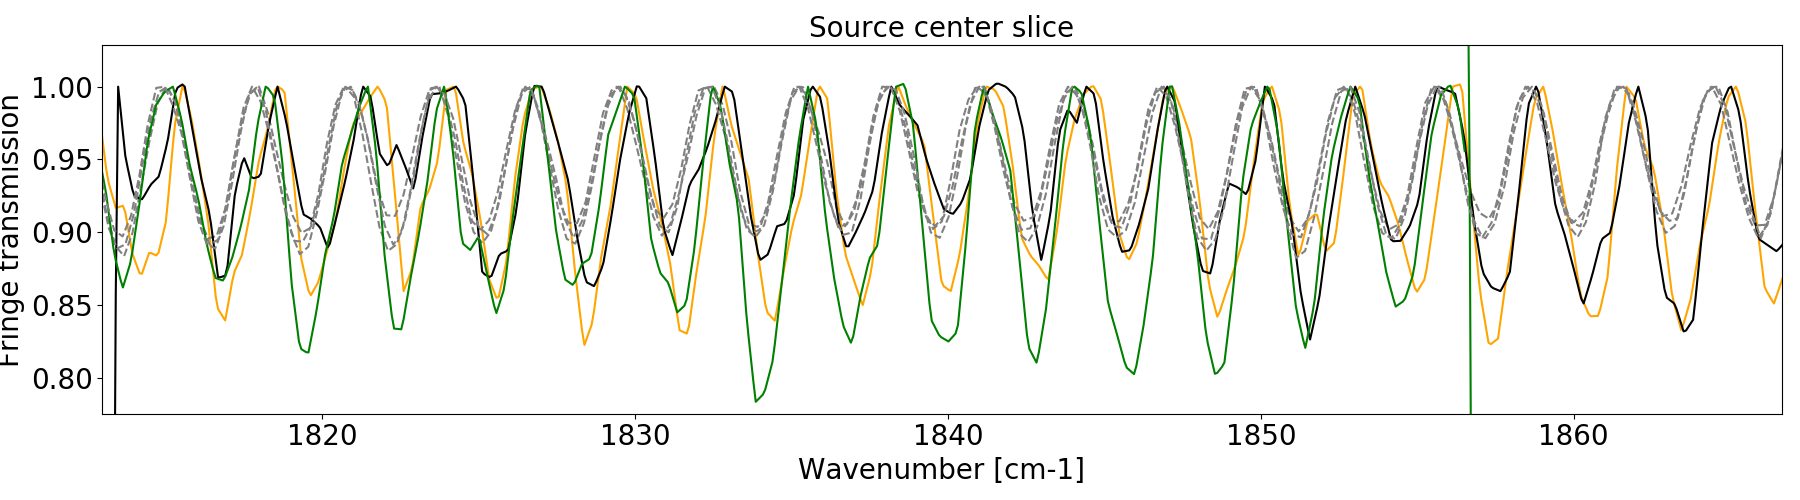

In [32]:
plt.figure(figsize=(18,5))
plt.title('Source center slice')

point_source_sci,point_source_bkg = mrsobs.FM_MTS_800K_BB_MRS_OPT_01_raster(lvl2path,pointing='P29') # mrsobs.FM_MTS_800K_BB_MRS_OPT_01_raster(lvl2path,pointing='P1')
point_source_bkgsubtr = point_source_sci-point_source_bkg
point_source_oddevencorr = funcs.OddEvenRowSignalCorrection(point_source_bkgsubtr)

counter = 0
xpos_offset = 0
counter +=1
color = colors[counter]

ypos,xpos = funcs.detpixel_trace_compactsource(point_source_oddevencorr,band,d2cMaps,offset_slice=0)

if len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) !=0:
    xpos[lambdaMap[ypos,xpos+xpos_offset]==0]+=1
if len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) !=0:
    xpos[lambdaMap[ypos,xpos+xpos_offset]==0]+=1

wavl = lambdaMap[ypos,xpos+xpos_offset]
wvnr = np.flipud(10000./wavl)
assert len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) ==0,'Check wavelength array for zeros!'

nFringes = 0.1710 * 2. * (wvnr[-1]-wvnr[0])
nPix = 1024.
#----------
signal = point_source_oddevencorr[ypos,xpos+xpos_offset]
discont_idxs = np.where(np.diff(xpos)!=0)[0]
for i in range(len(discont_idxs)-2):
    if discont_idxs[i+1]-discont_idxs[i] < 20:
        signal[discont_idxs[i]:discont_idxs[i+1]+1] = 0
sel_discont_wvl = discont_idxs[np.where(np.diff(discont_idxs) >2.*nPix/nFringes)[0]]
#-------------
arr  = np.flipud(signal)

new_wvnr = np.linspace(wvnr[~np.isinf(wvnr)][0],wvnr[~np.isinf(wvnr)][-1],4*nPix)
interp = scp_interpolate.interp1d(wvnr,arr)
new_arr = interp(new_wvnr)

peaks = funcs.norm_fringe(new_arr,min_dist=4*nPix/nFringes/1.6,k=1,ext=0)

sel_discont_wvnr = np.flipud(len(wavl)-sel_discont_wvl-2)
if sel_discont_wvnr[0] !=0:
    sel_discont_wvnr = np.concatenate([np.array([0]),sel_discont_wvnr])
#----------------
for i in range(len(sel_discont_wvnr)-1):
    idx1,idx2 = funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i]]),funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i+1]])
    norm_fringe = funcs.norm_fringe(new_arr[idx1:idx2],min_dist=4*nPix/nFringes/1.6,k=1,ext=0)
    plt.plot(new_wvnr[idx1:idx2],norm_fringe[0]/norm_fringe[2],color)
#--------
ext_source_norm_fringe = funcs.norm_fringe(ext_source_oddevencorr[ypos,xpos],min_dist=2)
plt.plot(np.flipud(10000./lambdaMap[ypos,xpos]),np.flipud(ext_source_norm_fringe[0]/ext_source_norm_fringe[2]),'gray',linestyle='dashed')
#--------

point_source_sci,point_source_bkg = mrsobs.FM_MTS_800K_BB_MRS_OPT_01_raster(lvl2path,pointing='P30') # mrsobs.FM_MTS_800K_BB_MRS_OPT_01_raster(lvl2path,pointing='P1')
point_source_bkgsubtr = point_source_sci-point_source_bkg
point_source_oddevencorr = funcs.OddEvenRowSignalCorrection(point_source_bkgsubtr)

xpos_offset = 0
counter +=1
color = colors[counter]

ypos,xpos = funcs.detpixel_trace_compactsource(point_source_oddevencorr,band,d2cMaps,offset_slice=0)

if len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) !=0:
    xpos[lambdaMap[ypos,xpos+xpos_offset]==0]+=1
if len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) !=0:
    xpos[lambdaMap[ypos,xpos+xpos_offset]==0]+=1

wavl = lambdaMap[ypos,xpos+xpos_offset]
wvnr = np.flipud(10000./wavl)
assert len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) ==0,'Check wavelength array for zeros!'

nFringes = 0.1710 * 2. * (wvnr[-1]-wvnr[0])
nPix = 1024.
#----------
signal = point_source_oddevencorr[ypos,xpos+xpos_offset]
discont_idxs = np.where(np.diff(xpos)!=0)[0]
for i in range(len(discont_idxs)-2):
    if discont_idxs[i+1]-discont_idxs[i] < 20:
        signal[discont_idxs[i]:discont_idxs[i+1]+1] = 0
sel_discont_wvl = discont_idxs[np.where(np.diff(discont_idxs) >2.*nPix/nFringes)[0]]
#-------------
arr  = np.flipud(signal)

new_wvnr = np.linspace(wvnr[~np.isinf(wvnr)][0],wvnr[~np.isinf(wvnr)][-1],4*nPix)
interp = scp_interpolate.interp1d(wvnr,arr)
new_arr = interp(new_wvnr)

peaks = funcs.norm_fringe(new_arr,min_dist=4*nPix/nFringes/1.6,k=1,ext=0)

sel_discont_wvnr = np.flipud(len(wavl)-sel_discont_wvl-2)
if sel_discont_wvnr[0] !=0:
    sel_discont_wvnr = np.concatenate([np.array([0]),sel_discont_wvnr])
#----------------
for i in range(len(sel_discont_wvnr)-1):
    idx1,idx2 = funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i]]),funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i+1]])
    norm_fringe = funcs.norm_fringe(new_arr[idx1:idx2],min_dist=4*nPix/nFringes/1.6,k=1,ext=0)
    plt.plot(new_wvnr[idx1:idx2],norm_fringe[0]/norm_fringe[2],color)
#--------
ext_source_norm_fringe = funcs.norm_fringe(ext_source_oddevencorr[ypos,xpos],min_dist=2)
plt.plot(np.flipud(10000./lambdaMap[ypos,xpos]),np.flipud(ext_source_norm_fringe[0]/ext_source_norm_fringe[2]),'gray',linestyle='dashed')
#--------

point_source_sci,point_source_bkg = mrsobs.FM_MTS_800K_BB_MRS_OPT_01_raster(lvl2path,pointing='P31') # mrsobs.FM_MTS_800K_BB_MRS_OPT_01_raster(lvl2path,pointing='P1')
point_source_bkgsubtr = point_source_sci-point_source_bkg
point_source_oddevencorr = funcs.OddEvenRowSignalCorrection(point_source_bkgsubtr)

xpos_offset = 0
counter +=1
color = colors[counter]

ypos,xpos = funcs.detpixel_trace_compactsource(point_source_oddevencorr,band,d2cMaps,offset_slice=0)

if len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) !=0:
    xpos[lambdaMap[ypos,xpos+xpos_offset]==0]+=1
if len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) !=0:
    xpos[lambdaMap[ypos,xpos+xpos_offset]==0]+=1

wavl = lambdaMap[ypos,xpos+xpos_offset]
wvnr = np.flipud(10000./wavl)
assert len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) ==0,'Check wavelength array for zeros!'

nFringes = 0.1710 * 2. * (wvnr[-1]-wvnr[0])
nPix = 1024.
#----------
signal = point_source_oddevencorr[ypos,xpos+xpos_offset]
discont_idxs = np.where(np.diff(xpos)!=0)[0]
for i in range(len(discont_idxs)-2):
    if discont_idxs[i+1]-discont_idxs[i] < 20:
        signal[discont_idxs[i]:discont_idxs[i+1]+1] = 0
sel_discont_wvl = discont_idxs[np.where(np.diff(discont_idxs) >2.*nPix/nFringes)[0]]
#-------------
arr  = np.flipud(signal)

new_wvnr = np.linspace(wvnr[~np.isinf(wvnr)][0],wvnr[~np.isinf(wvnr)][-1],4*nPix)
interp = scp_interpolate.interp1d(wvnr,arr)
new_arr = interp(new_wvnr)

peaks = funcs.norm_fringe(new_arr,min_dist=4*nPix/nFringes/1.6,k=1,ext=0)

sel_discont_wvnr = np.flipud(len(wavl)-sel_discont_wvl-2)
if sel_discont_wvnr[0] !=0:
    sel_discont_wvnr = np.concatenate([np.array([0]),sel_discont_wvnr])
#----------------
for i in range(len(sel_discont_wvnr)-1):
    idx1,idx2 = funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i]]),funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i+1]])
    norm_fringe = funcs.norm_fringe(new_arr[idx1:idx2],min_dist=4*nPix/nFringes/1.6,k=1,ext=0)
    plt.plot(new_wvnr[idx1:idx2],norm_fringe[0]/norm_fringe[2],color)
#--------
ext_source_norm_fringe = funcs.norm_fringe(ext_source_oddevencorr[ypos,xpos],min_dist=2)
plt.plot(np.flipud(10000./lambdaMap[ypos,xpos]),np.flipud(ext_source_norm_fringe[0]/ext_source_norm_fringe[2]),'gray',linestyle='dashed')
#--------





plt.ylim(0.6,1.05)
plt.xlabel('Wavenumber [cm-1]')
plt.ylabel('Fringe transmission')
plt.tight_layout()

# All observations

In [69]:
fringe_img = np.zeros((1024,1032))

# select pointing and calibrate data
pointings = mrsobs.FM_MTS_800K_BB_MRS_OPT_01_raster(lvl2path,pointing='all')[0].keys()
for pointing in pointings:
    print 'Pointing {}'.format(pointing)
    point_source_sci,point_source_bkg = mrsobs.FM_MTS_800K_BB_MRS_OPT_01_raster(lvl2path,pointing=pointing)
    point_source_bkgsubtr = point_source_sci-point_source_bkg
    point_source_oddevencorr = funcs.OddEvenRowSignalCorrection(point_source_bkgsubtr)

#     for xpos_offset in [-2,-1,0,1,2]:
#         ypos,xpos = funcs.detpixel_trace_compactsource(point_source_oddevencorr,band,d2cMaps,offset_slice=-1)

#         while len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) !=0:
#             xpos[lambdaMap[ypos,xpos+xpos_offset]==0]+=1

#         wavl = lambdaMap[ypos,xpos+xpos_offset]
#         wvnr = np.flipud(10000./wavl)
#         assert len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) ==0,'Check wavelength array for zeros!'

#         nFringes = 0.1710 * 2. * (wvnr[-1]-wvnr[0])
#         nPix = 1024.
#         #----------
#         signal = point_source_oddevencorr[ypos,xpos+xpos_offset]
#         discont_idxs = np.where(np.diff(xpos)!=0)[0]
#         for i in range(len(discont_idxs)-2):
#             if discont_idxs[i+1]-discont_idxs[i] < 20:
#                 signal[discont_idxs[i]:discont_idxs[i+1]+1] = 0
#         sel_discont_wvl = discont_idxs[np.where(np.diff(discont_idxs) >2.*nPix/nFringes)[0]]
#         #-------------
#         arr  = np.flipud(signal)

#         new_wvnr = np.linspace(wvnr[~np.isinf(wvnr)][0],wvnr[~np.isinf(wvnr)][-1],4*nPix)
#         interp = scp_interpolate.interp1d(wvnr,arr)
#         new_arr = interp(new_wvnr)

#         peaks = funcs.norm_fringe(new_arr,min_dist=4*nPix/nFringes/1.6,k=1,ext=0)

#         sel_discont_wvnr = np.flipud(len(wavl)-sel_discont_wvl-2)
#         if sel_discont_wvnr[0] !=0:
#             sel_discont_wvnr = np.concatenate([np.array([0]),sel_discont_wvnr])
#         #----------------
#         save_wvnr,save_transm = [],[]
#         for i in range(len(sel_discont_wvnr)-1):
#             idx1,idx2 = funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i]]),funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i+1]])
#             if np.mean(new_arr[idx1:idx2][~np.isnan(new_arr[idx1:idx2])]) == 0.:
#                 continue
#             norm_fringe = funcs.norm_fringe(new_arr[idx1:idx2],min_dist=4*nPix/nFringes/1.6,k=1,ext=0)
#             save_wvnr.extend(new_wvnr[idx1:idx2])
#             save_transm.extend(norm_fringe[0]/norm_fringe[2])
#         save_wvnr,save_transm = np.array(save_wvnr),np.array(save_transm)
#         interp_transm = scp_interpolate.interp1d(save_wvnr,save_transm)
#         sel = (wvnr>save_wvnr.min()) & (wvnr<save_wvnr.max())
#         fringe_img[ypos[sel],(xpos+xpos_offset)[sel]] = interp_transm(wvnr[sel])
    
    for xpos_offset in [-2,-1,0,1,2]:
        ypos,xpos = funcs.detpixel_trace_compactsource(point_source_oddevencorr,band,d2cMaps,offset_slice=0)

        while len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) !=0:
            xpos[lambdaMap[ypos,xpos+xpos_offset]==0]+=1

        wavl = lambdaMap[ypos,xpos+xpos_offset]
        wvnr = np.flipud(10000./wavl)
        assert len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) ==0,'Check wavelength array for zeros!'

        nFringes = 0.1710 * 2. * (wvnr[-1]-wvnr[0])
        nPix = 1024.
        #----------
        signal = point_source_oddevencorr[ypos,xpos+xpos_offset]
        discont_idxs = np.where(np.diff(xpos)!=0)[0]
        for i in range(len(discont_idxs)-2):
            if discont_idxs[i+1]-discont_idxs[i] < 20:
                signal[discont_idxs[i]:discont_idxs[i+1]+1] = 0
        sel_discont_wvl = discont_idxs[np.where(np.diff(discont_idxs) >2.*nPix/nFringes)[0]]
        #-------------
        arr  = np.flipud(signal)

        new_wvnr = np.linspace(wvnr[~np.isinf(wvnr)][0],wvnr[~np.isinf(wvnr)][-1],4*nPix)
        interp = scp_interpolate.interp1d(wvnr,arr)
        new_arr = interp(new_wvnr)

        peaks = funcs.norm_fringe(new_arr,min_dist=4*nPix/nFringes/1.6,k=1,ext=0)

        sel_discont_wvnr = np.flipud(len(wavl)-sel_discont_wvl-2)
        if sel_discont_wvnr[0] !=0:
            sel_discont_wvnr = np.concatenate([np.array([0]),sel_discont_wvnr])
        #----------------
        save_wvnr,save_transm = [],[]
        for i in range(len(sel_discont_wvnr)-1):
            idx1,idx2 = funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i]]),funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i+1]])
            if np.mean(new_arr[idx1:idx2][~np.isnan(new_arr[idx1:idx2])]) == 0.:
                continue
            norm_fringe = funcs.norm_fringe(new_arr[idx1:idx2],min_dist=4*nPix/nFringes/1.6,k=1,ext=0)
            save_wvnr.extend(new_wvnr[idx1:idx2])
            save_transm.extend(norm_fringe[0]/norm_fringe[2])
        save_wvnr,save_transm = np.array(save_wvnr),np.array(save_transm)
        interp_transm = scp_interpolate.interp1d(save_wvnr,save_transm)
        sel = (wvnr>save_wvnr.min()) & (wvnr<save_wvnr.max())
        fringe_img[ypos[sel],(xpos+xpos_offset)[sel]] = interp_transm(wvnr[sel])

#     for xpos_offset in [-2,-1,0,1,2]:
#         ypos,xpos = funcs.detpixel_trace_compactsource(point_source_oddevencorr,band,d2cMaps,offset_slice=1)

#         while len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) !=0:
#             xpos[lambdaMap[ypos,xpos+xpos_offset]==0]+=1

#         wavl = lambdaMap[ypos,xpos+xpos_offset]
#         wvnr = np.flipud(10000./wavl)
#         assert len(np.where(lambdaMap[ypos,xpos+xpos_offset]==0)[0]) ==0,'Check wavelength array for zeros!'

#         nFringes = 0.1710 * 2. * (wvnr[-1]-wvnr[0])
#         nPix = 1024.
#         #----------
#         signal = point_source_oddevencorr[ypos,xpos+xpos_offset]
#         discont_idxs = np.where(np.diff(xpos)!=0)[0]
#         for i in range(len(discont_idxs)-2):
#             if discont_idxs[i+1]-discont_idxs[i] < 20:
#                 signal[discont_idxs[i]:discont_idxs[i+1]+1] = 0
#         sel_discont_wvl = discont_idxs[np.where(np.diff(discont_idxs) >2.*nPix/nFringes)[0]]
#         #-------------
#         arr  = np.flipud(signal)

#         new_wvnr = np.linspace(wvnr[~np.isinf(wvnr)][0],wvnr[~np.isinf(wvnr)][-1],4*nPix)
#         interp = scp_interpolate.interp1d(wvnr,arr)
#         new_arr = interp(new_wvnr)

#         peaks = funcs.norm_fringe(new_arr,min_dist=4*nPix/nFringes/1.6,k=1,ext=0)

#         sel_discont_wvnr = np.flipud(len(wavl)-sel_discont_wvl-2)
#         if sel_discont_wvnr[0] !=0:
#             sel_discont_wvnr = np.concatenate([np.array([0]),sel_discont_wvnr])
#         #----------------
#         save_wvnr,save_transm = [],[]
#         for i in range(len(sel_discont_wvnr)-1):
#             idx1,idx2 = funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i]]),funcs.find_nearest(new_wvnr,wvnr[sel_discont_wvnr[i+1]])
#             if np.mean(new_arr[idx1:idx2][~np.isnan(new_arr[idx1:idx2])]) == 0.:
#                 continue
#             norm_fringe = funcs.norm_fringe(new_arr[idx1:idx2],min_dist=4*nPix/nFringes/1.6,k=1,ext=0)
#             save_wvnr.extend(new_wvnr[idx1:idx2])
#             save_transm.extend(norm_fringe[0]/norm_fringe[2])
#         save_wvnr,save_transm = np.array(save_wvnr),np.array(save_transm)
#         interp_transm = scp_interpolate.interp1d(save_wvnr,save_transm)
#         sel = (wvnr>save_wvnr.min()) & (wvnr<save_wvnr.max())
#         fringe_img[ypos[sel],(xpos+xpos_offset)[sel]] = interp_transm(wvnr[sel])

Pointing P38
Pointing P39
Pointing P32
Pointing P33
Pointing P30
Pointing P31
Pointing P36
Pointing P37
Pointing P34
Pointing P35
Pointing P54
Pointing P55
Pointing P49
Pointing P48
Pointing P47
Pointing P46
Pointing P45
Pointing P44
Pointing P43
Pointing P42
Pointing P41
Pointing P40
Pointing P58
Pointing P10
Pointing P11
Pointing P12
Pointing P13
Pointing P14
Pointing P15
Pointing P16
Pointing P17
Pointing P18
Pointing P19
Pointing P56
Pointing P57
Pointing P50
Pointing P51
Pointing P52
Pointing P53
Pointing P2
Pointing P3
Pointing P1
Pointing P6
Pointing P7
Pointing P4
Pointing P5
Pointing P59
Pointing P8
Pointing P9
Pointing P61
Pointing P60
Pointing P63
Pointing P62
Pointing P25
Pointing P24
Pointing P27
Pointing P26
Pointing P21
Pointing P20
Pointing P23
Pointing P22
Pointing P29
Pointing P28


<IPython.core.display.Javascript object>


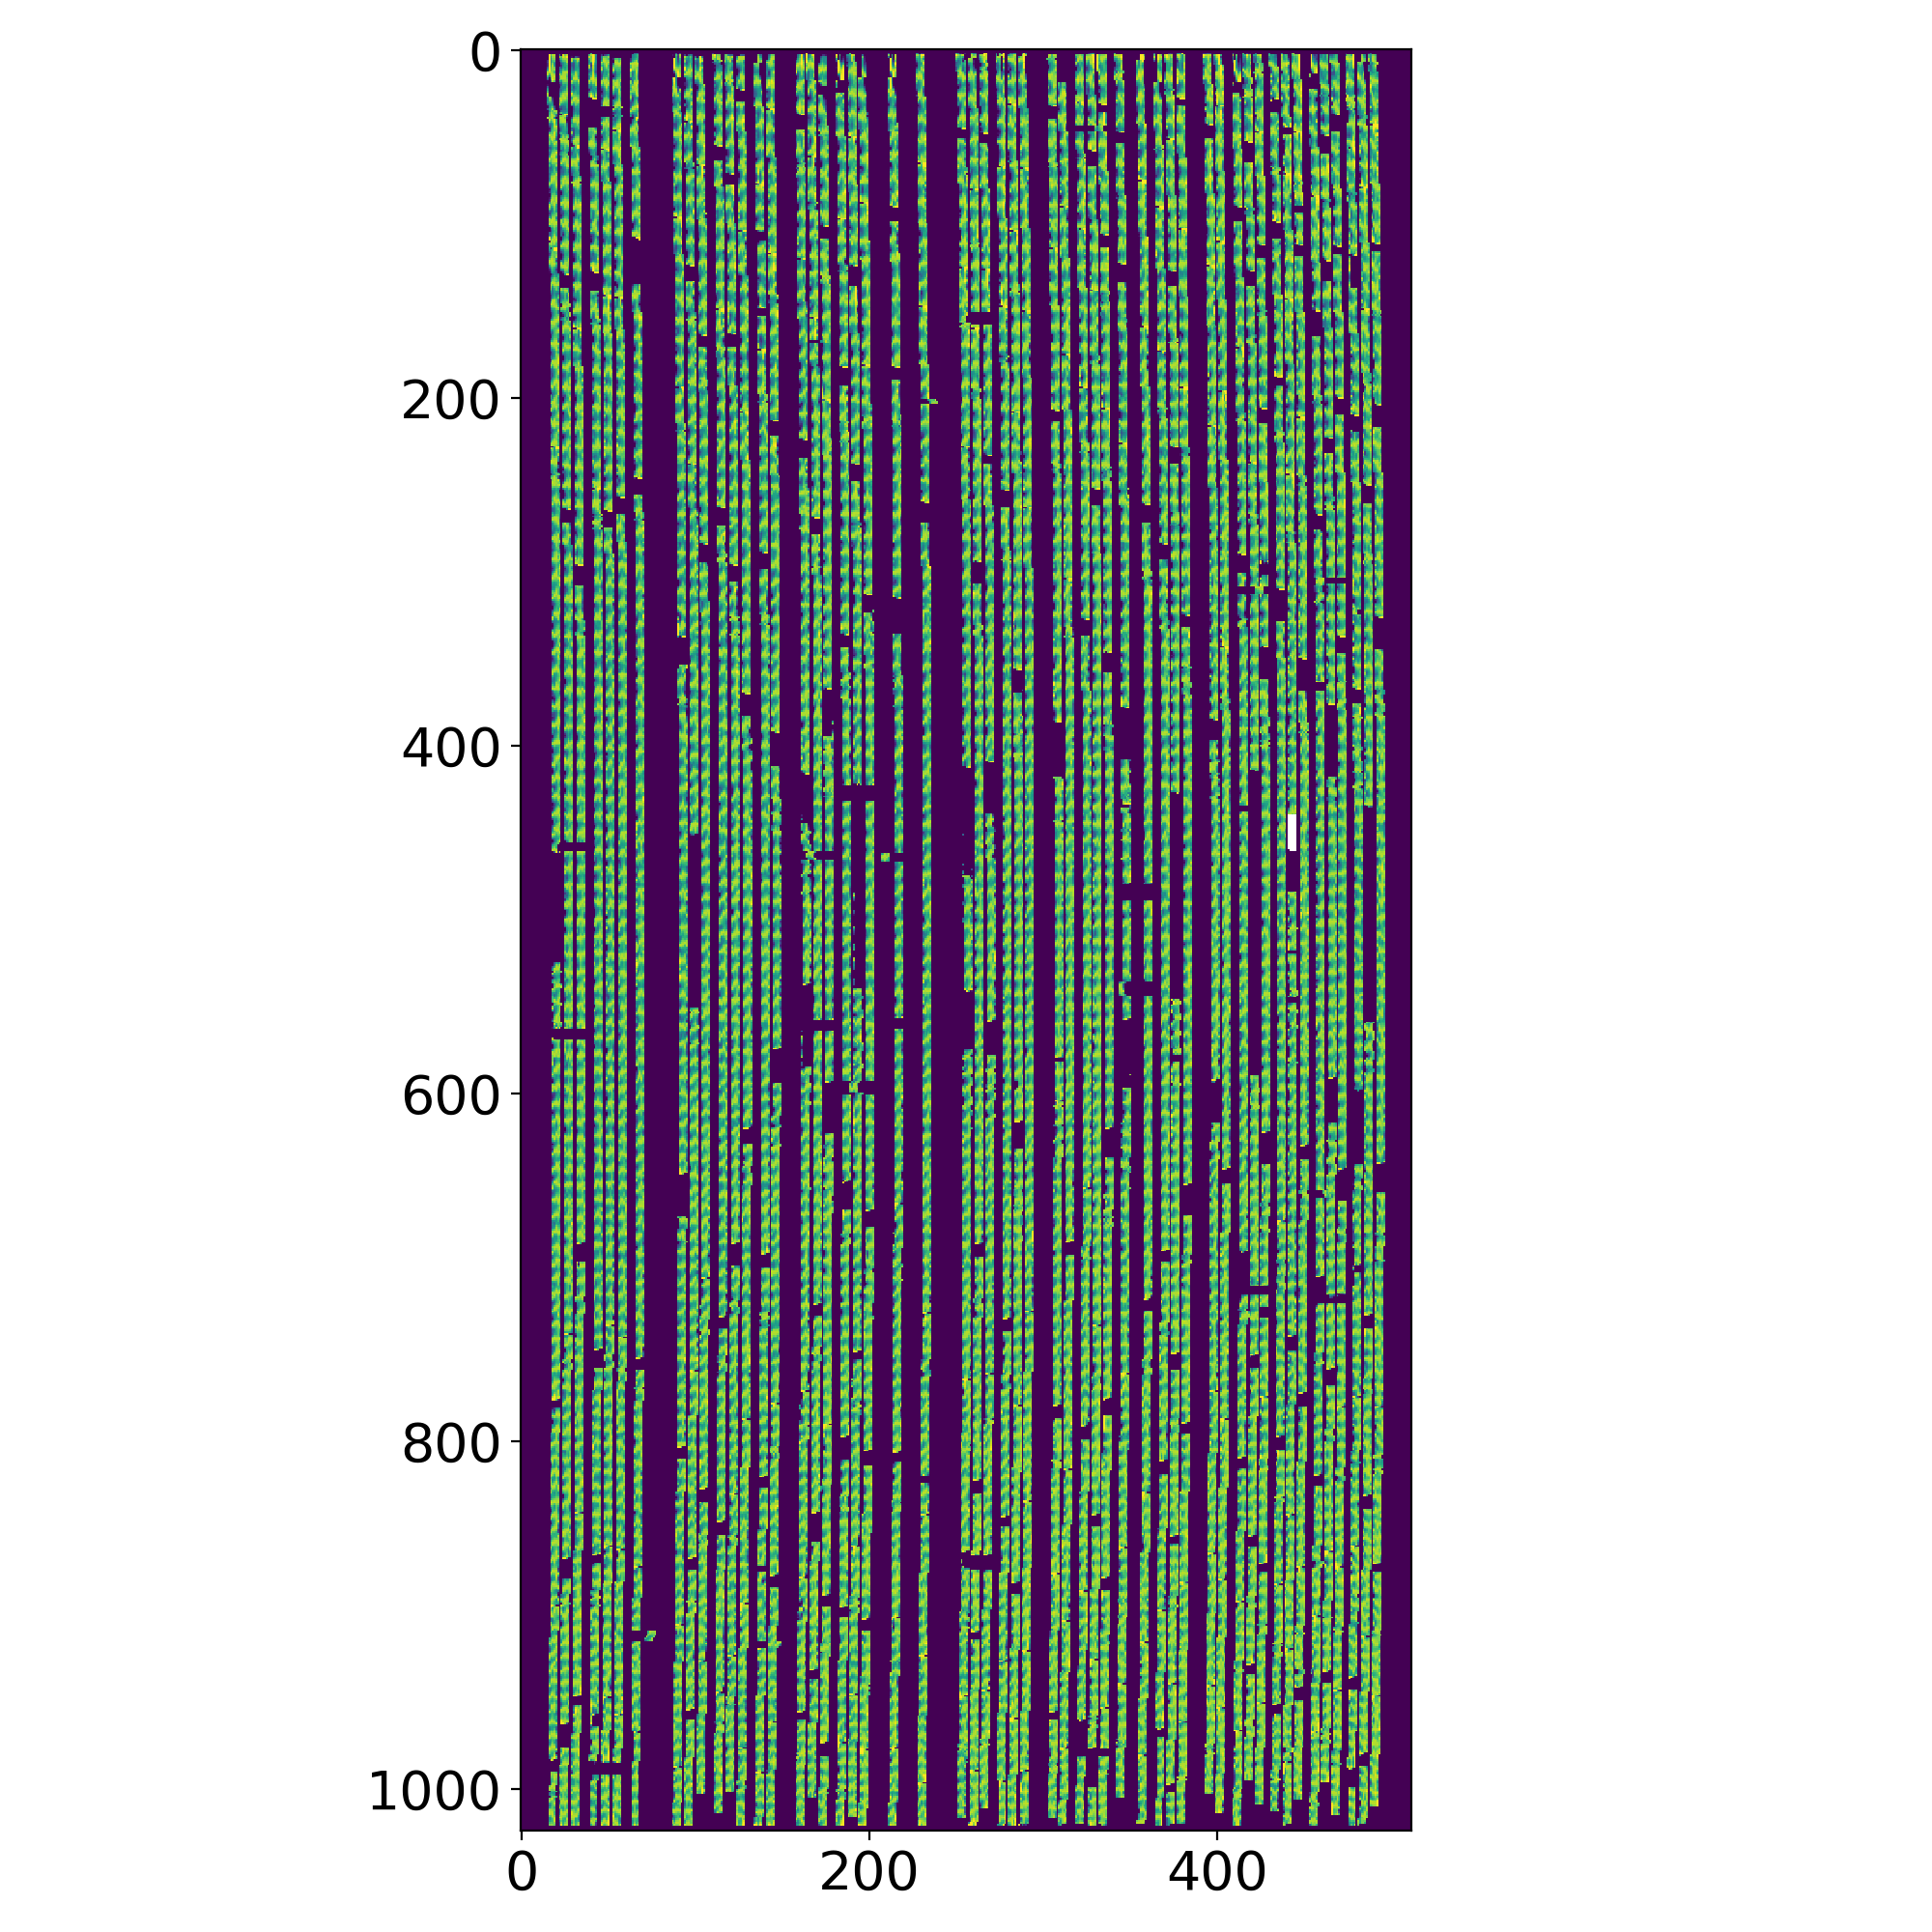

In [75]:
plt.figure(figsize=(10,10) )
plt.imshow(fringe_img[:,:512],vmin=0.6,vmax=1.05,zorder=0)
# plt.imshow(d2cMaps['sliceMap'][:,:512],alpha=0.4,zorder=1)
plt.tight_layout()

## Conclusions:  

## Follow-up question:  